In [1]:
from dsapol import dsapol
from matplotlib import pyplot as plt
import pylab
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
%load_ext autoreload
%autoreload 2 

ext = ".png"


In [2]:
def gaussian(x,amp,mean,sigma):
    return amp*np.exp(-0.5*((x-mean)**2)/sigma**2)

def chi(x,amp,dof,nc):
    return amp*ncx2.pdf(x,dof,nc)

In [3]:
dir(dsapol)

['DEFAULT_WDIR',
 'FRB_plot_all',
 'FilReader',
 'FilterbankBlock',
 'Header',
 'SNR_fit',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'arr_to_list_check',
 'avg_freq',
 'avg_time',
 'calibrate',
 'calibrate_RM',
 'calibrate_matrix',
 'compute_fit',
 'convert_width',
 'create_freq_time',
 'create_stokes_arr',
 'ext',
 'faraday_error',
 'faradaycal',
 'faradaycal_SNR',
 'find_beam',
 'find_peak',
 'gaincal',
 'gaincal_full',
 'get_calibs',
 'get_calmatrix_from_ratio_phasediff',
 'get_pol_angle',
 'get_pol_fraction',
 'get_stokes_2D',
 'get_stokes_vs_freq',
 'get_stokes_vs_time',
 'json',
 'np',
 'phasecal',
 'phasecal_full',
 'pickle',
 'plot_spectra_1D',
 'plot_spectra_2D',
 'plot_timestream_1D',
 'plt',
 'pylab',
 'read_fil_data_dsa']

In [4]:
help(dsapol.get_stokes_2D)

Help on function get_stokes_2D in module dsapol.dsapol:

get_stokes_2D(datadir, fn_prefix, nsamps, n_t=1, n_f=1, n_off=3000, sub_offpulse_mean=True)
    This function generates 2D dynamic spectra for each stokes parameter, taken from
    filterbank files in the specified directory. Optionally normalizes by subtracting off-pulse mean, but
    would not recommend this for calibrators.
    
    Inputs: datadir --> str, path to directory containing all 4 stokes filterbank files
            fn_prefix -->str, prefix of filterbank files, e.g. '220319aaeb_dev' for file '220319aaeb_dev_0/1/2/3.fil'
            n_t --> int, number of time samples to bin by (average over)
            n_f --> int, number of frequency samples to bin by (average over)
            n_off --> int, specifies index of end of off-pulse samples
            sub_offpulse_mean --> bool, if True, subtracts mean of data up to n_off samples
    Outputs: (I,Q,U,V,fobj,timeaxis,freq_arr,wav_arr) --> 2D dynamic spectra for I,Q,U,V;

# Leakage Testing

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/3C48ane_dev_3.fil
Binning by 1 in 

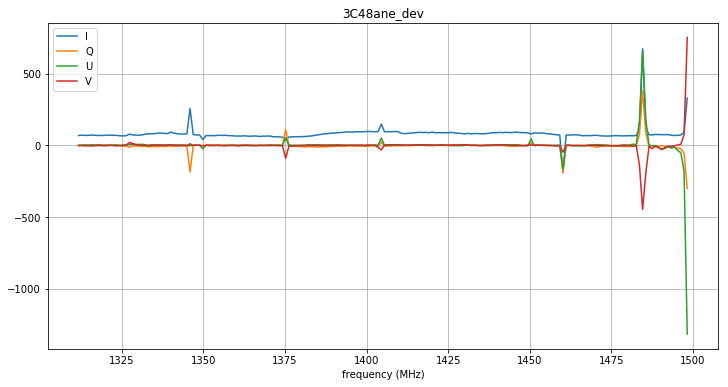

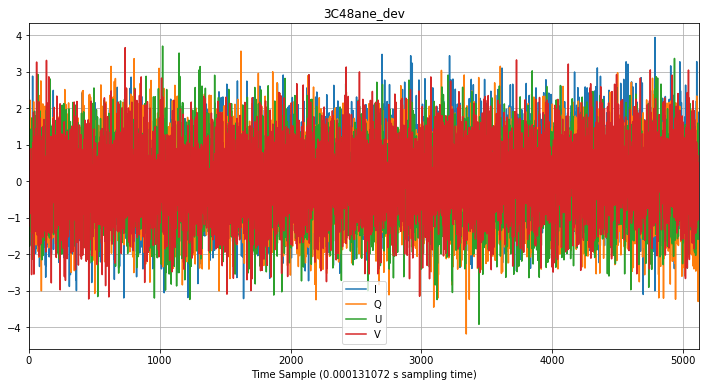

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:666: RuntimeWarning: invalid value encountered in sqrt
  ratio = np.sqrt((I_obs + Q_obs)/(I_obs - Q_obs))
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)


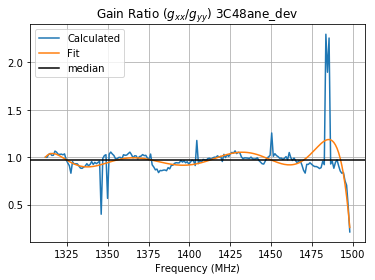

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/3C286jqc_dev_3.fil


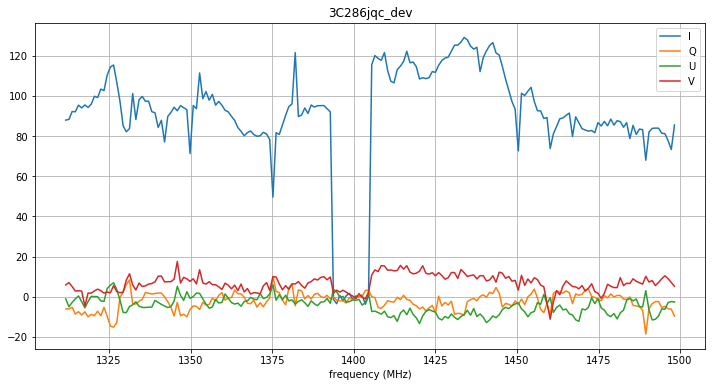

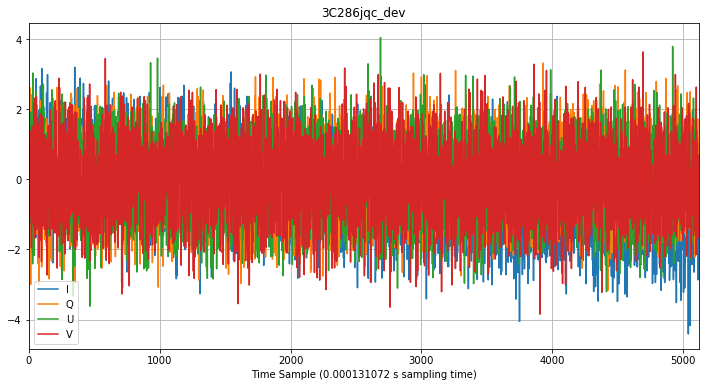

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)


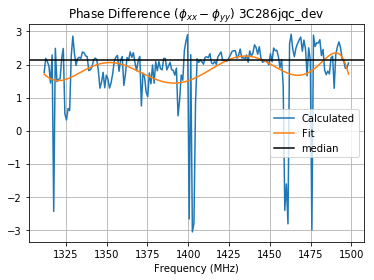

In [3]:
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_test/'
source_name = '3C48'
obs_name = 'ane'
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
ratio,ratio_fit_params = dsapol.gaincal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)

ratio_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    ratio_fit += ratio_fit_params[i]*(freq_test[0]**(deg-i))
ratio_use = ratio_fit

datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286_test/'
source_name = '3C286'
obs_name = 'jqc'
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
phase,phase_fit_params = dsapol.phasecal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)

phase_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    phase_fit += phase_fit_params[i]*(freq_test[0]**(deg-i))
phase_use = phase_fit


(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_use,phase_use)



# Get beam for each unpolarized calibrator

In [112]:
sources = ["3C48","3C147","3C196","3C286","3C295","3C84"]
obs = {"3C48":["nrd","gkk","arf"],"3C147":["zky","fuz","yoo"],"3C196":["ssd","xpk","alp"],"3C286":["fmp","pel"],"3C295":["rxq","zti","bxm"],"3C84":["gba","odx","erm"]}
pols = {"3C48":0.004,"3C147":0.001,"3C196":0,"3C286":0.1,"3C295":0,"3C84":0.001}





In [113]:
obs

{'3C48': ['nrd', 'gkk', 'arf'],
 '3C147': ['zky', 'fuz', 'yoo'],
 '3C196': ['ssd', 'xpk', 'alp'],
 '3C286': ['fmp', 'pel'],
 '3C295': ['rxq', 'zti', 'bxm'],
 '3C84': ['gba', 'odx', 'erm']}

3C48 nrd


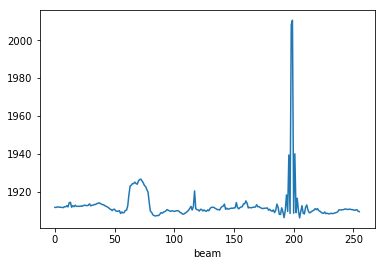

3C48 gkk


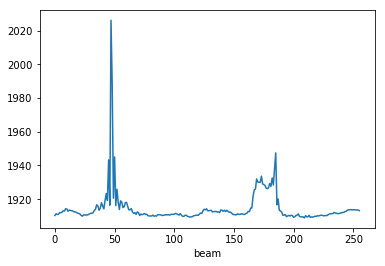

3C48 arf


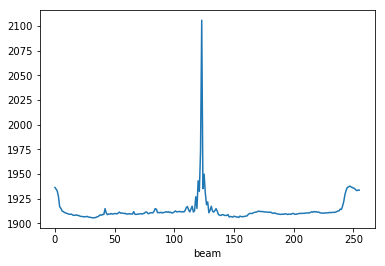

3C147 zky


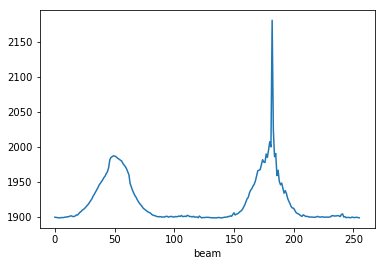

3C147 fuz


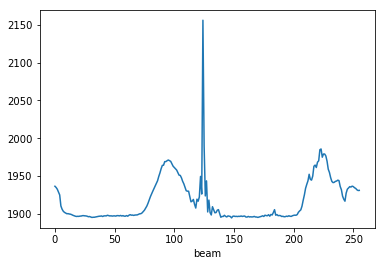

3C147 yoo


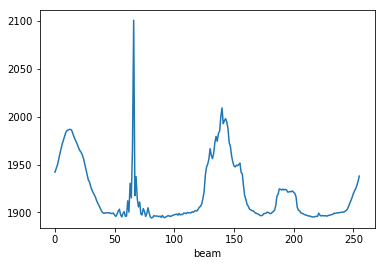

3C196 ssd


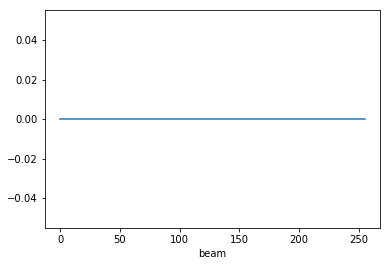

3C196 xpk


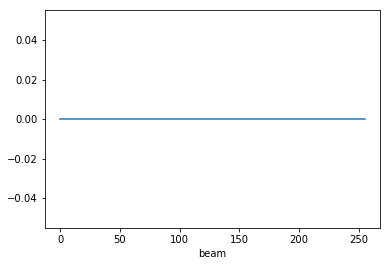

3C196 alp


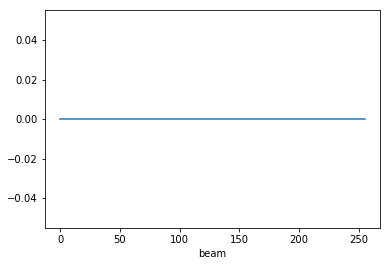

3C286 fmp


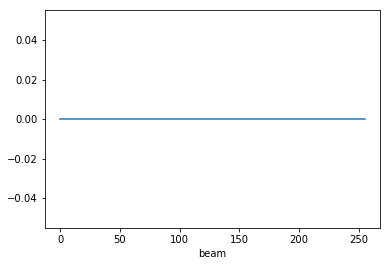

3C286 pel


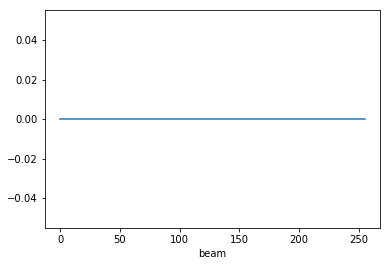

3C295 rxq


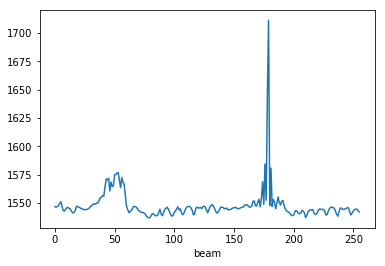

3C295 zti


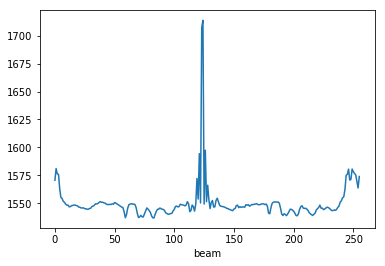

3C295 bxm


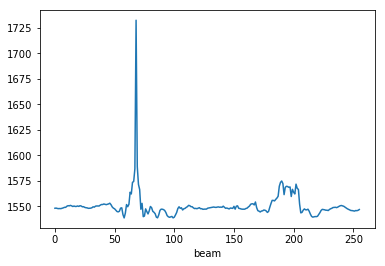

3C84 gba


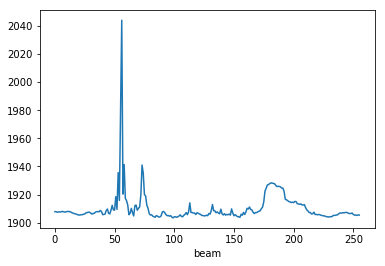

3C84 odx


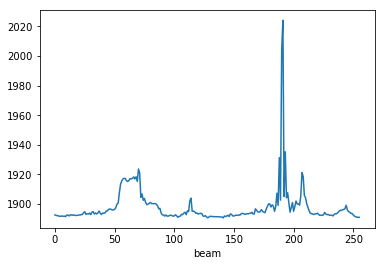

3C84 erm


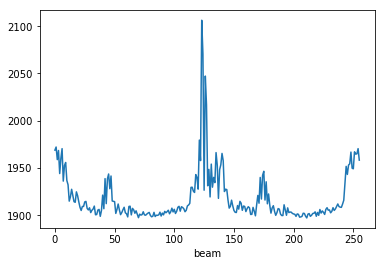

In [10]:
beams = []
for s in obs.keys():
    source =str(s)
    for o in obs[s]:
        print(source,o)
        (bm,tmp)=dsapol.find_beam(file_suffix="_"+source + o ,shape=(16,7680,256),path='/home/ubuntu/sherman/scratch_weights_update_2022-06-03/'+source+"_22-06-15/",plot=True,show=True)
        beams.append(bm)
        

In [114]:
beams = np.array([199, 47, 123, 182, 124, 66, 0, 0, 0, 0, 0, 179, 124, 68, 56, 191, 123])

In [115]:
bad_obs = ["3C196ssd","3C196xpk","3C196alp","3C286fmp","3C286pel"]


3C48 nrd
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22

<Figure size 432x288 with 0 Axes>

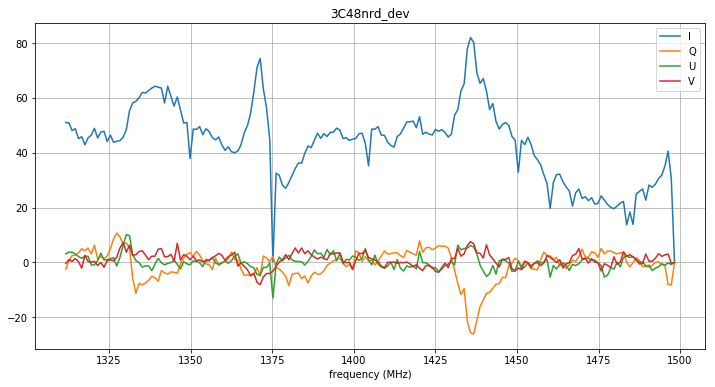

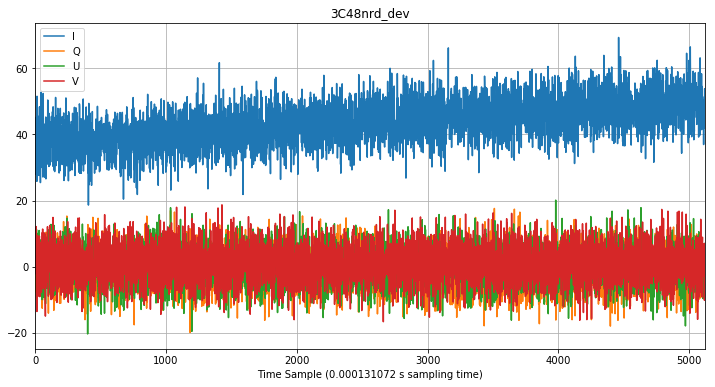

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


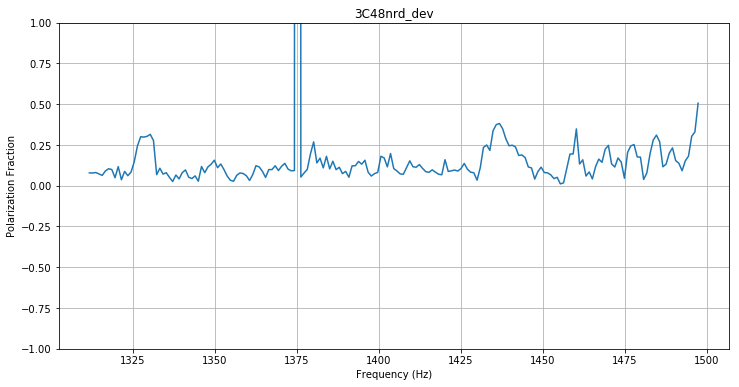

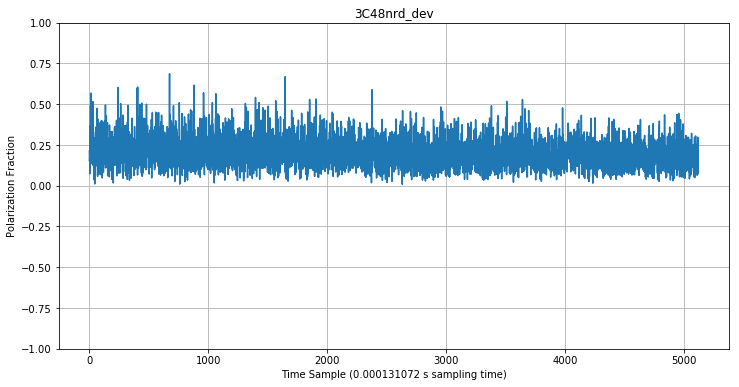

0.20136437714816152
3C48 gkk
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48gkk_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_updat

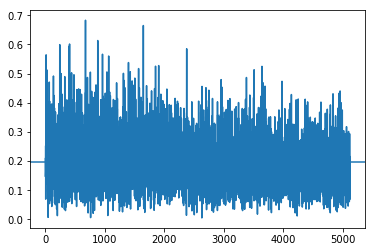

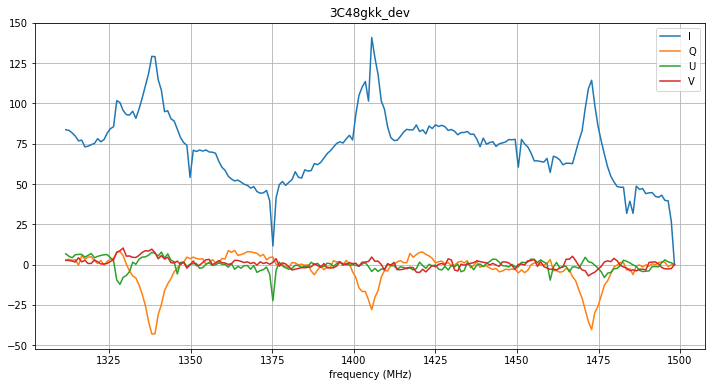

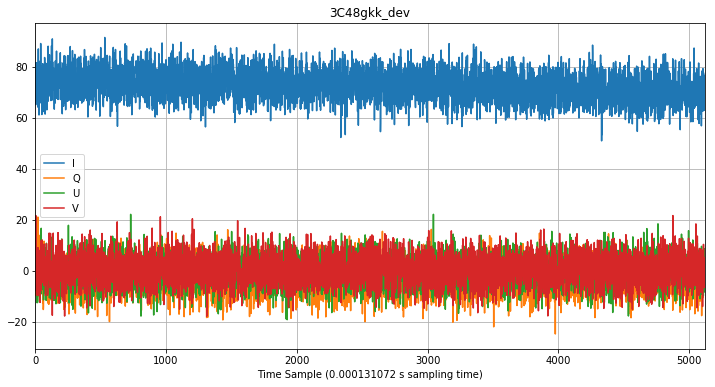

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


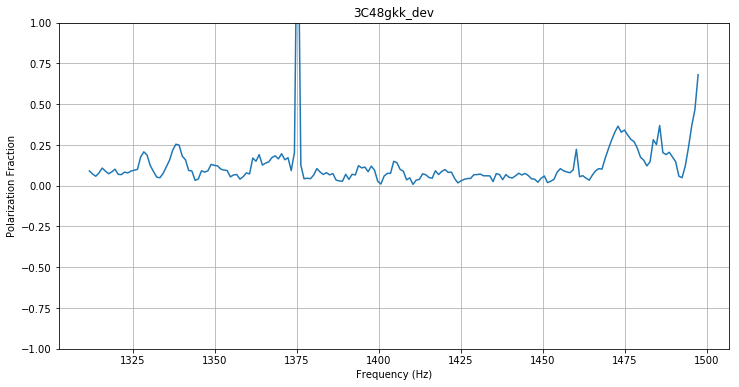

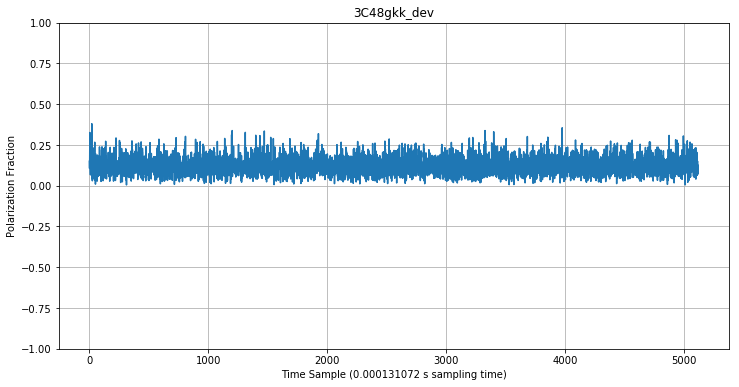

0.12183109437430026
3C48 arf
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48arf_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_updat

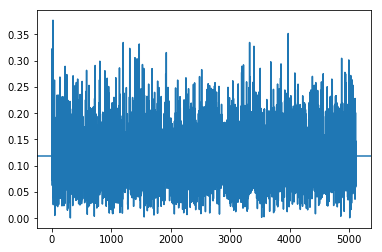

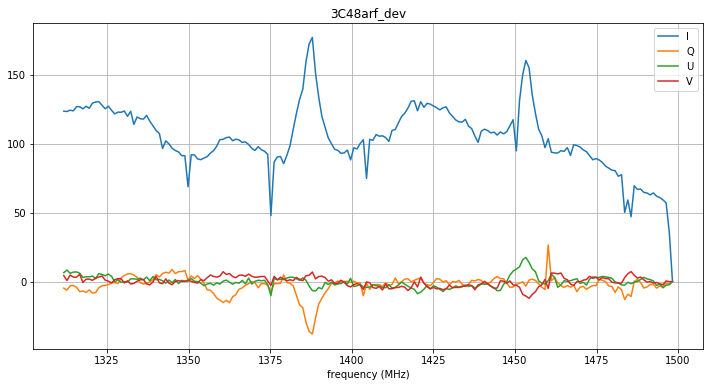

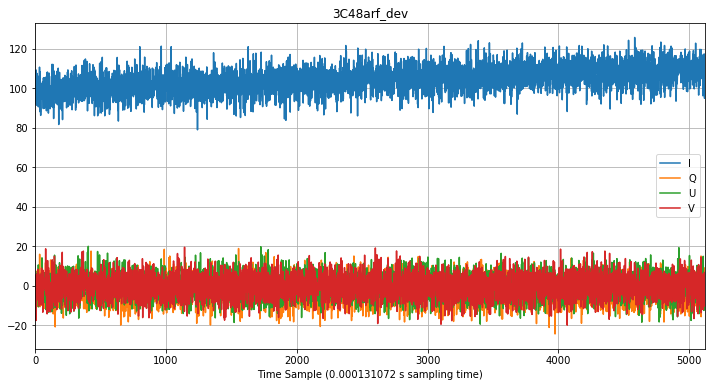

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


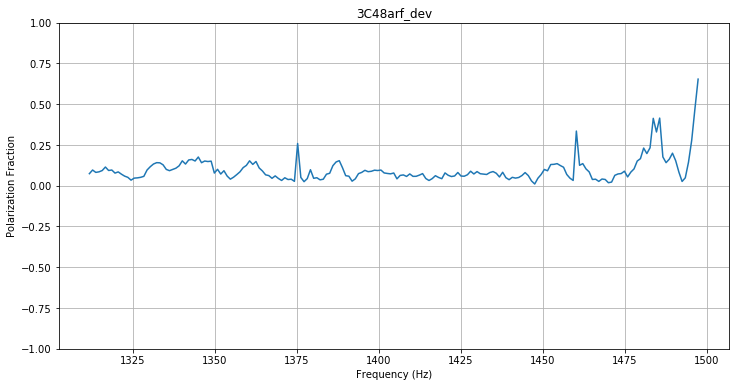

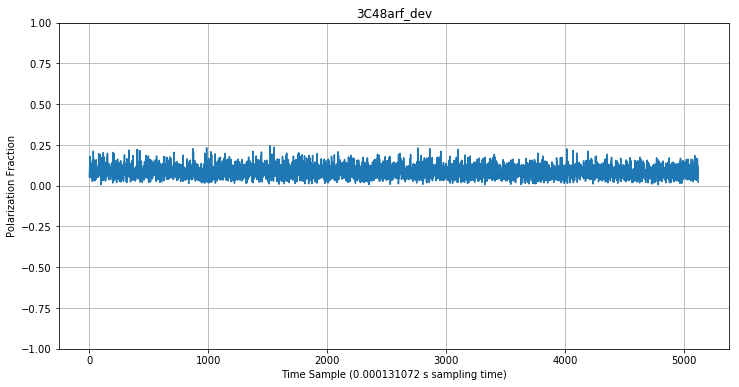

0.08667984335116666
3C147 zky
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147zky_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratc

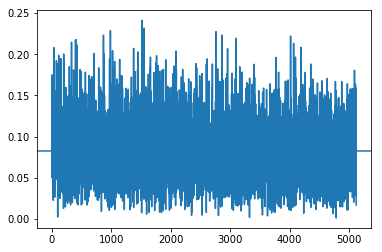

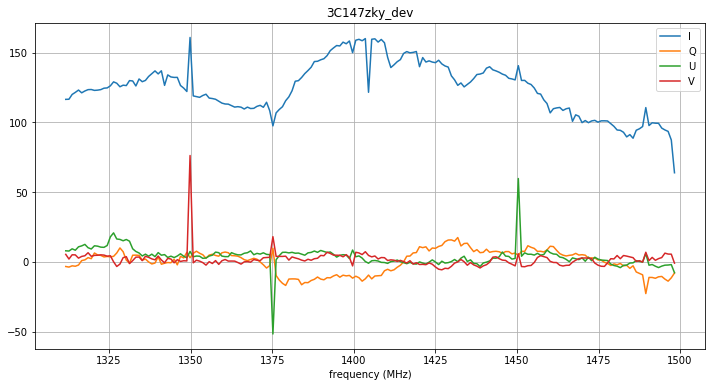

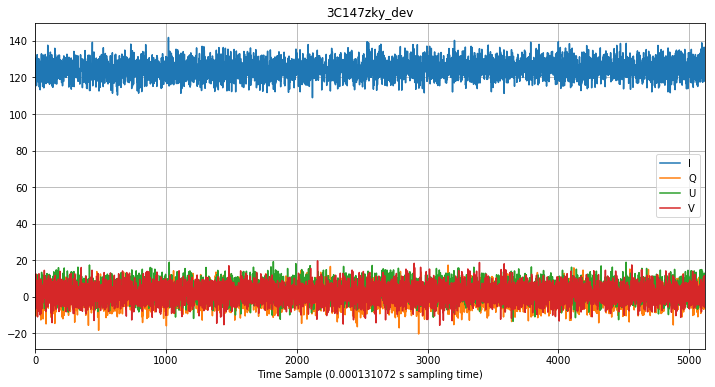

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


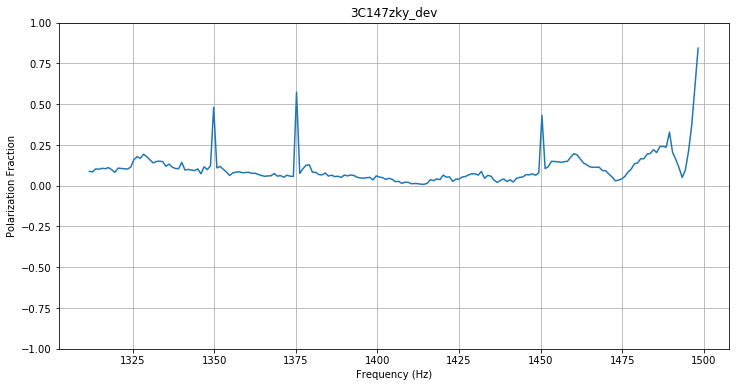

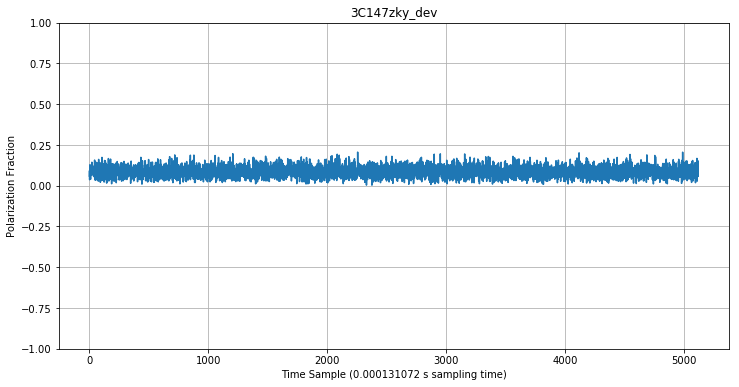

0.08604180503113432
3C147 fuz
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147fuz_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratc

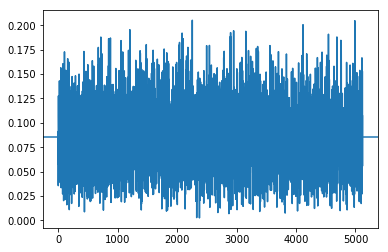

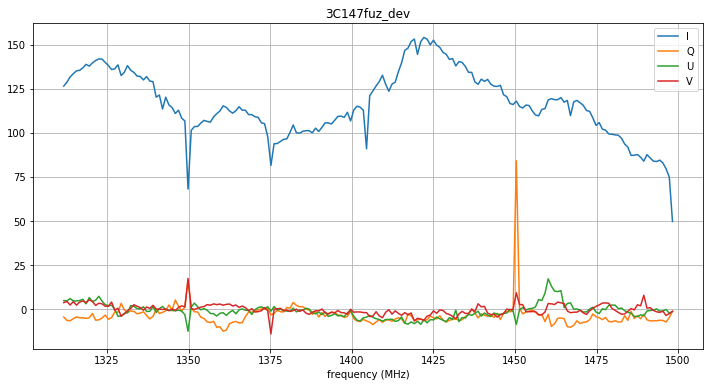

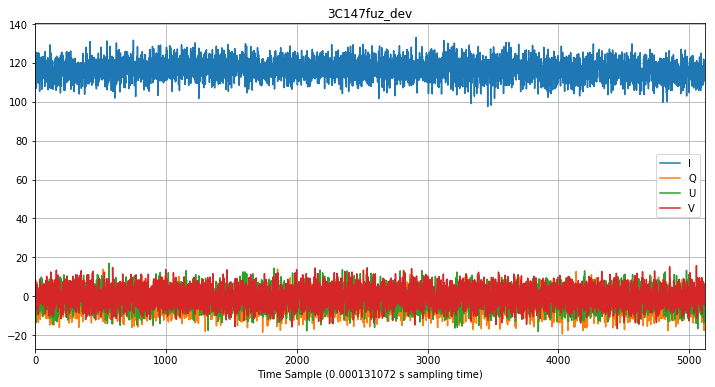

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


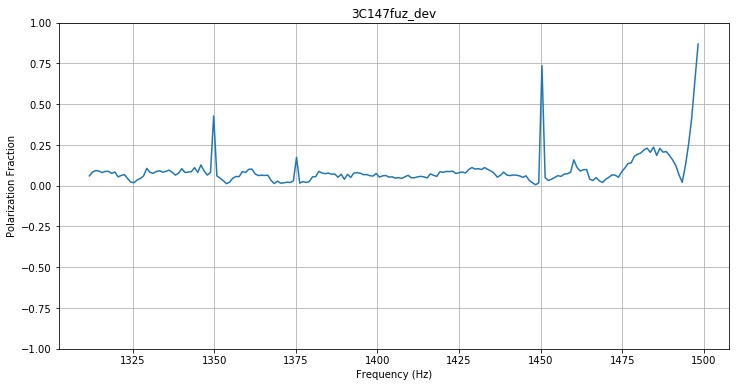

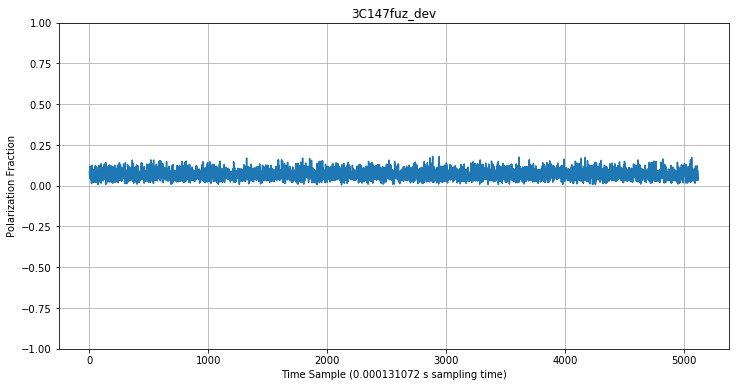

0.07053109550168912
3C147 yoo
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C147_22-06-15/3C147yoo_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratc

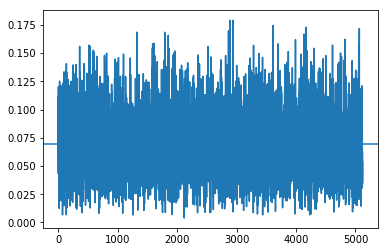

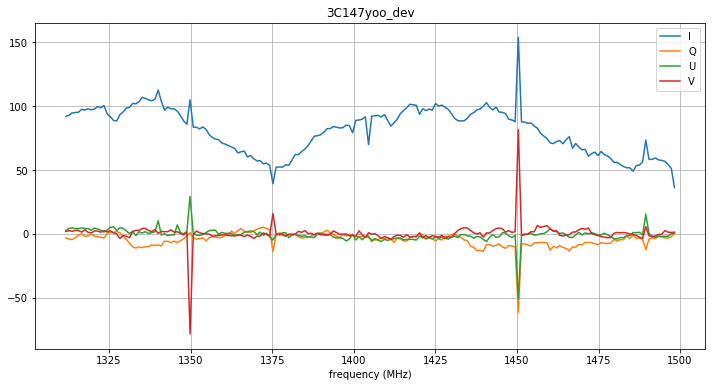

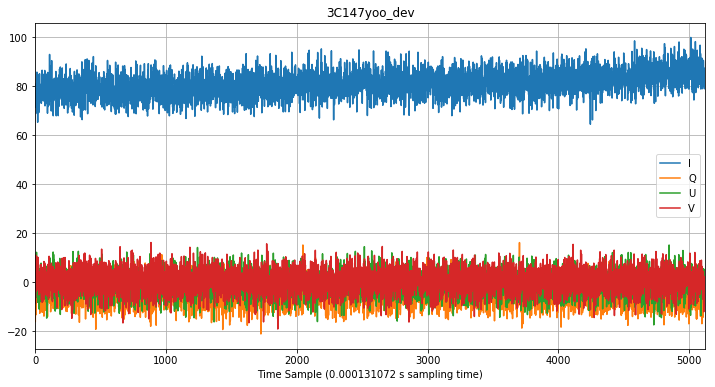

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


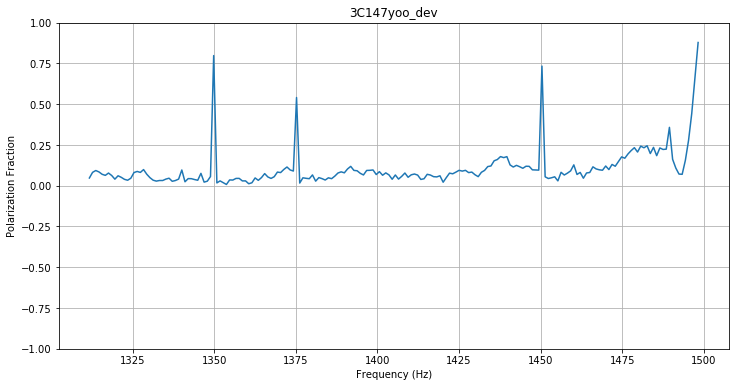

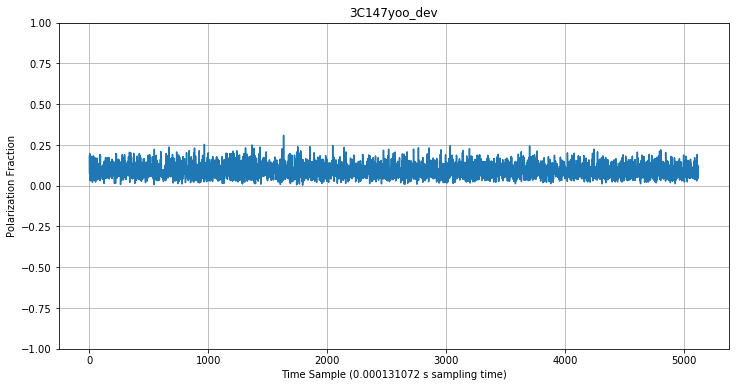

0.09369713608390459
3C196 ssd
Bad observation, skipping
3C196 xpk
Bad observation, skipping
3C196 alp
Bad observation, skipping
3C286 fmp
Bad observation, skipping
3C286 pel
Bad observation, skipping
3C295 rxq
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295rxq_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295rxq_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295rxq_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295rxq_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295rxq_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295

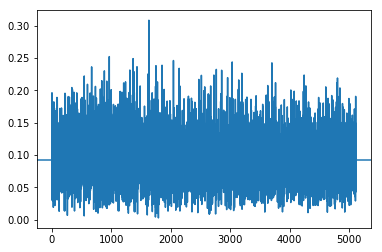

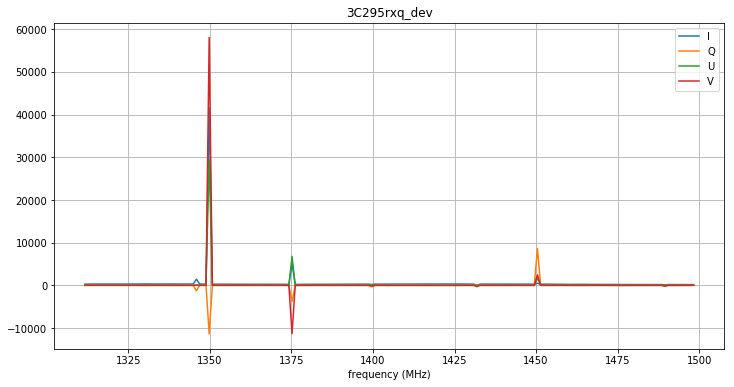

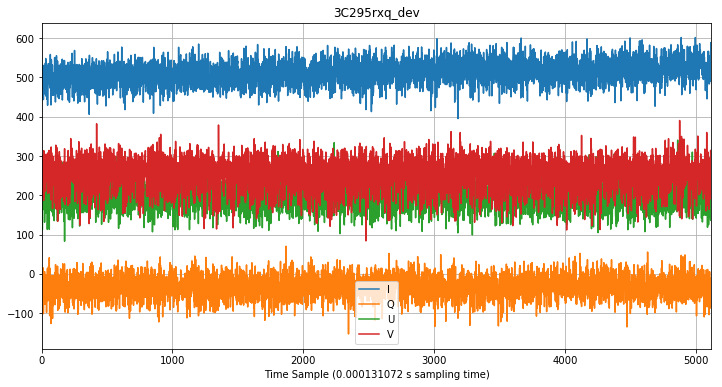

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


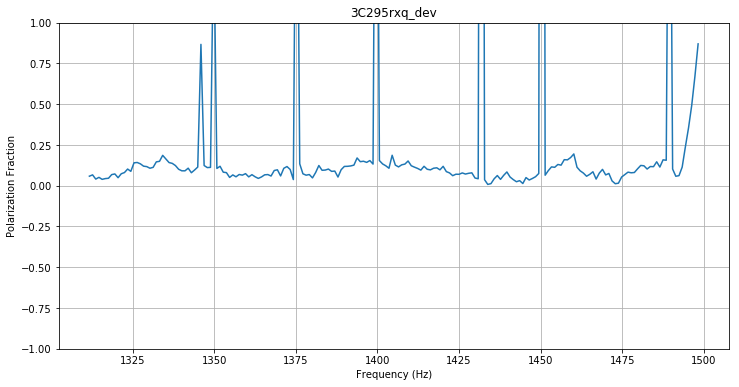

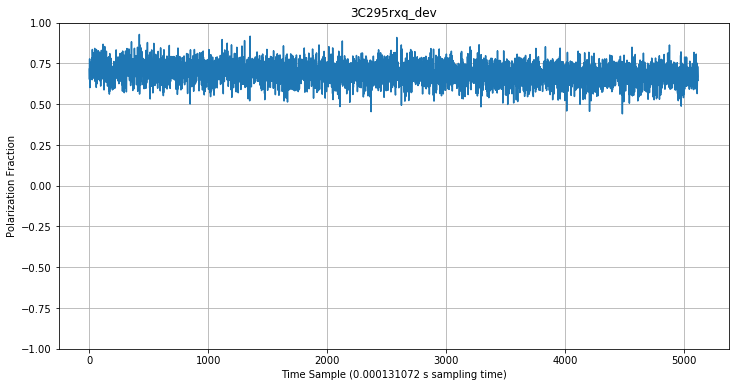

0.6921865991207365
3C295 zti
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295zti_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch

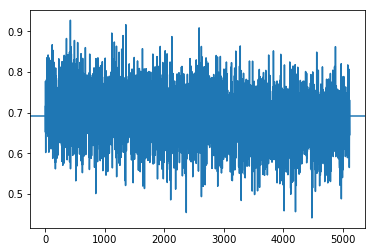

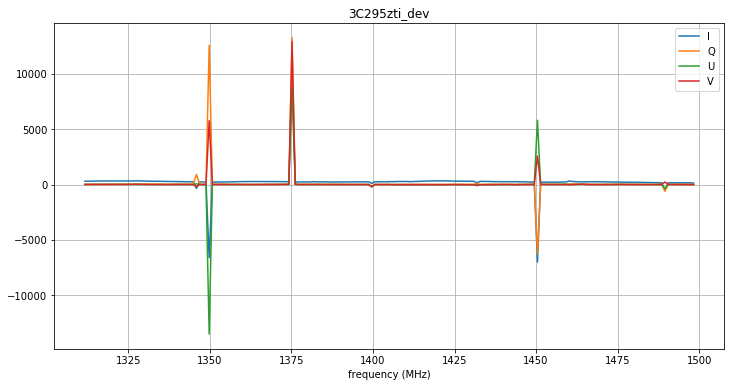

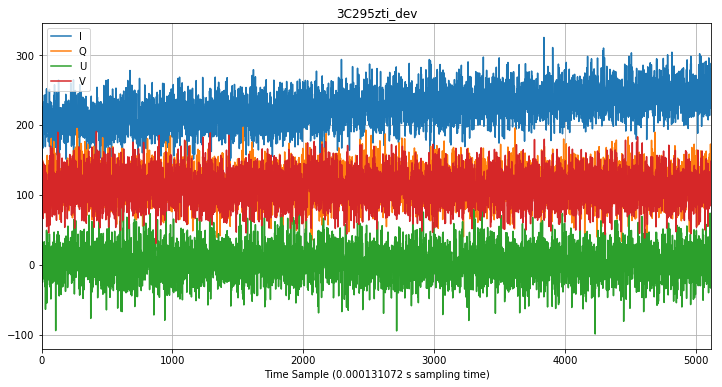

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


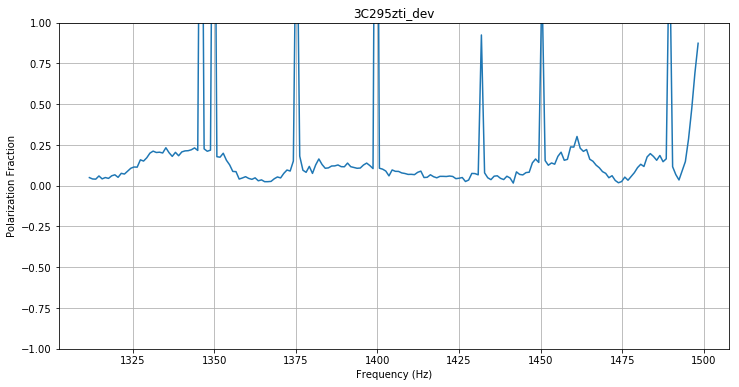

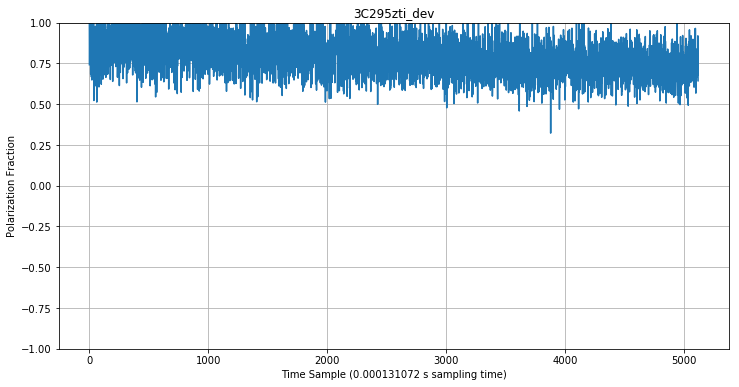

0.7944026811740292
3C295 bxm
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C295_22-06-15/3C295bxm_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch

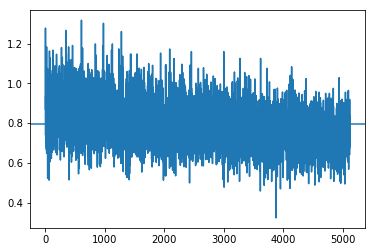

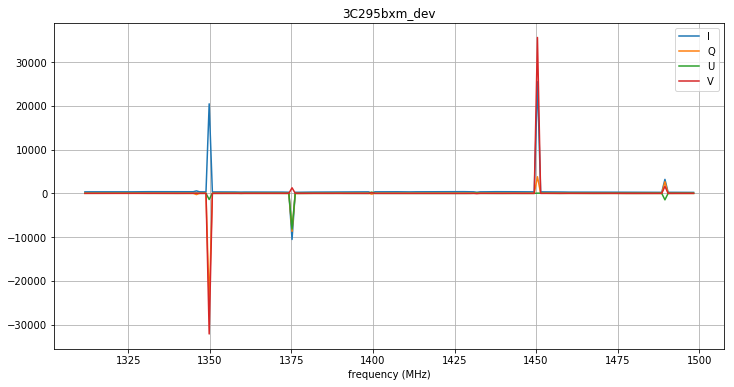

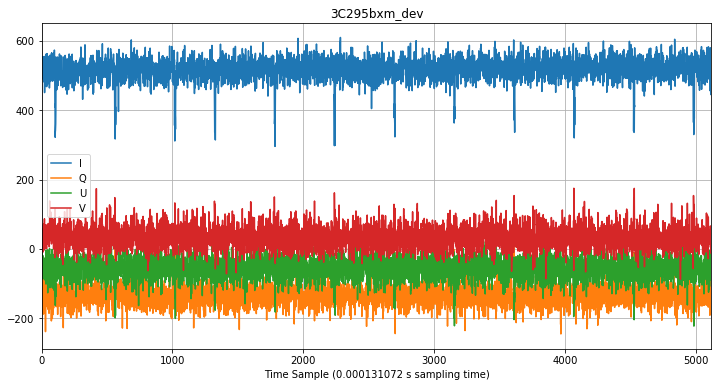

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


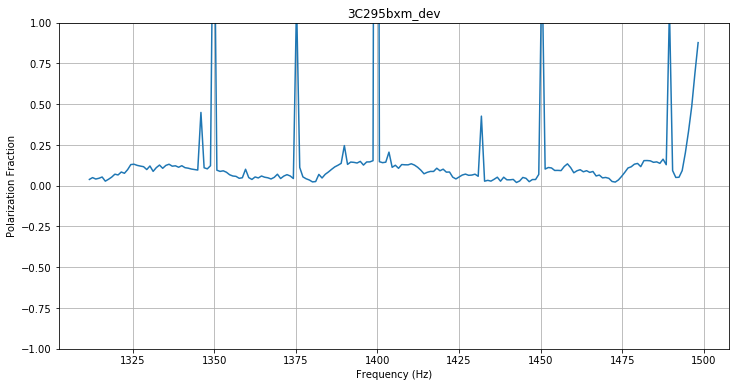

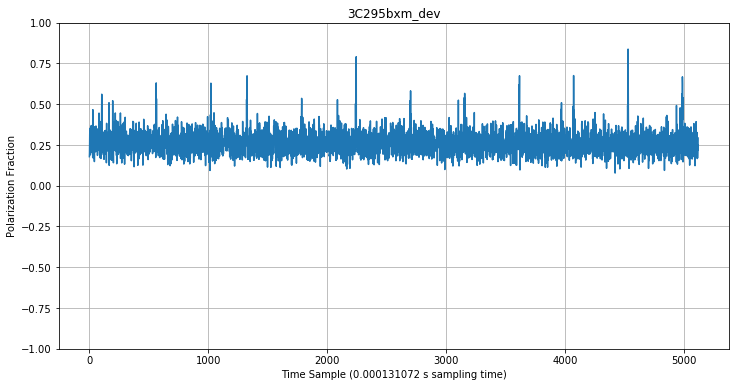

0.2629374402379998
3C84 gba
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84gba_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update

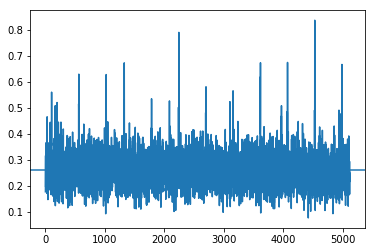

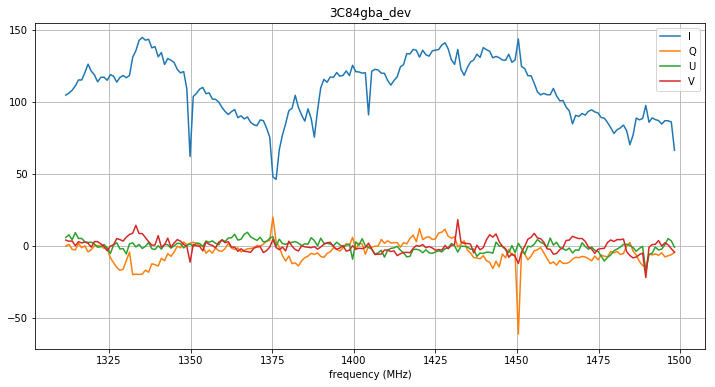

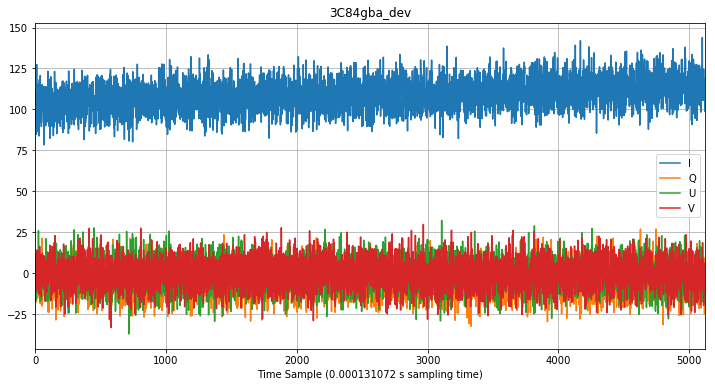

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


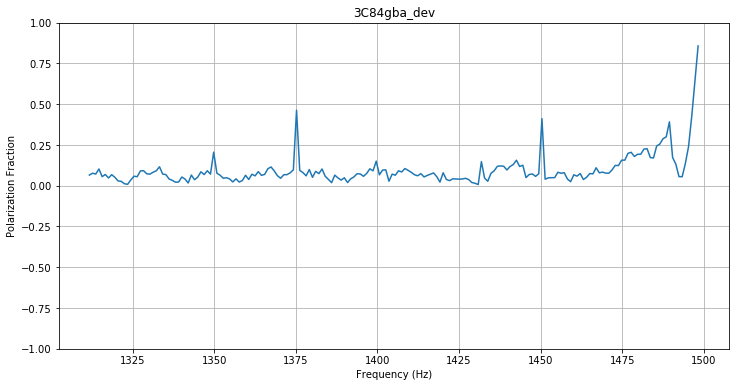

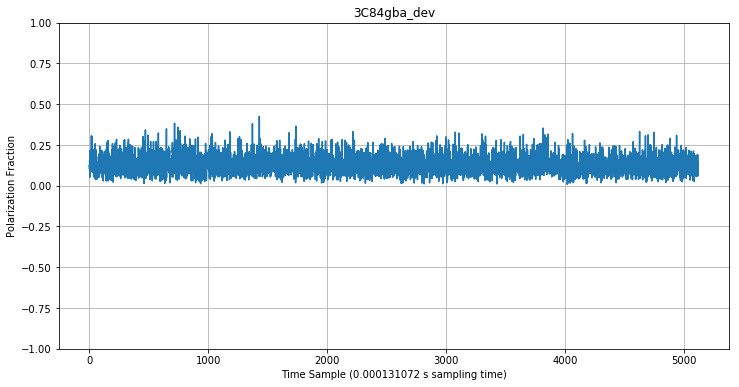

0.1290449700566681
3C84 odx
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update

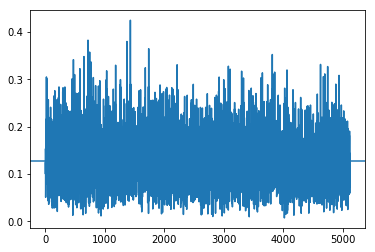

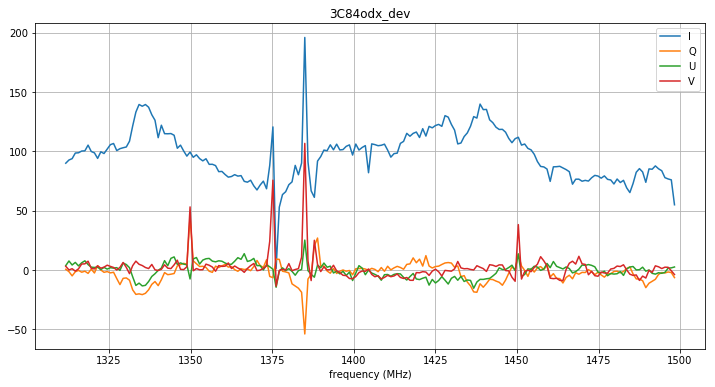

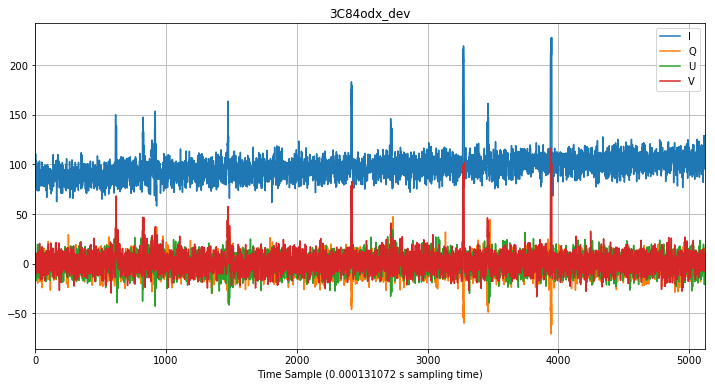

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


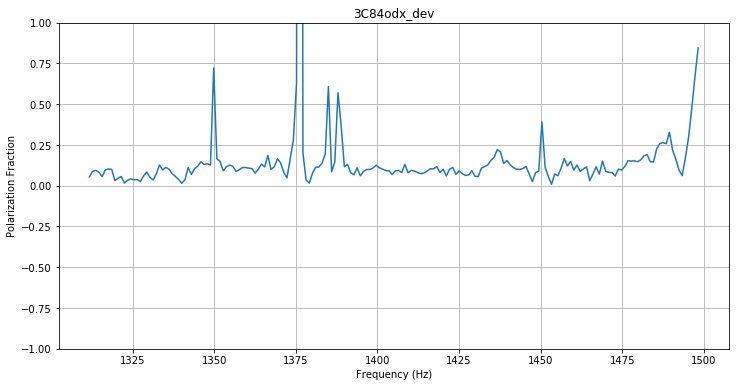

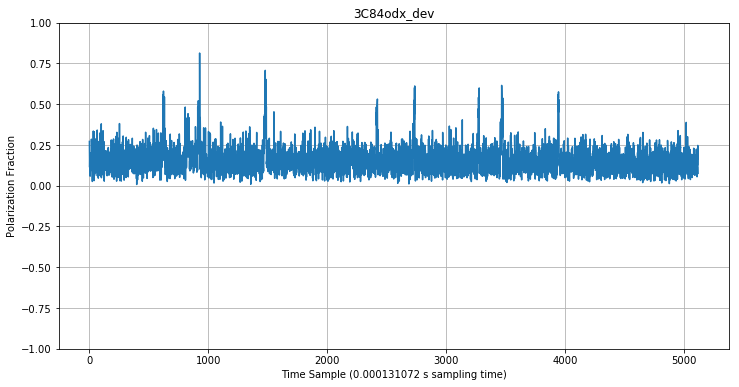

0.15503075227111923
3C84 erm
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84erm_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_updat

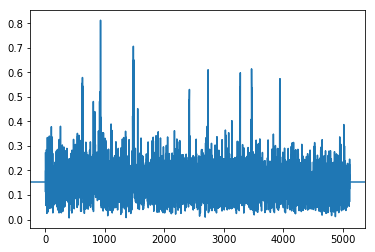

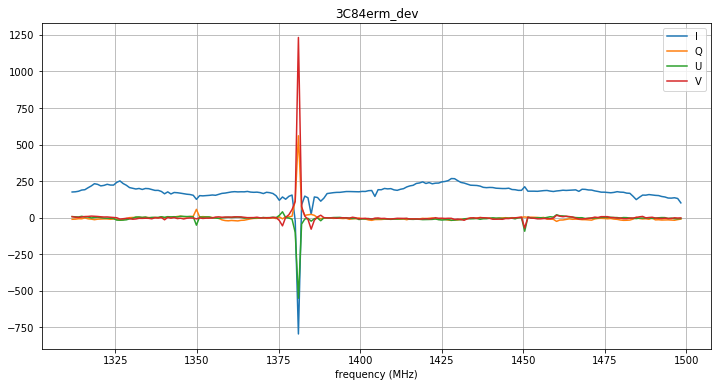

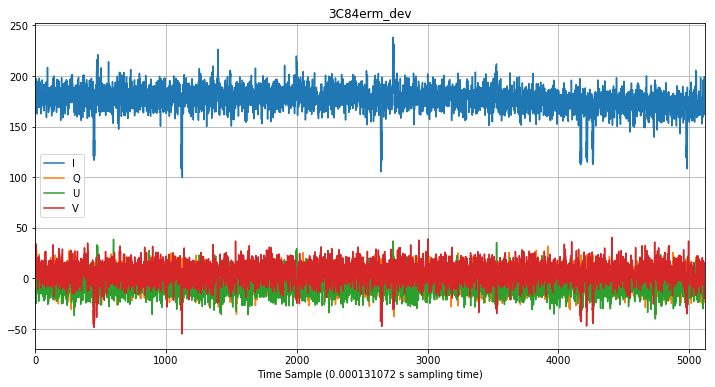

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


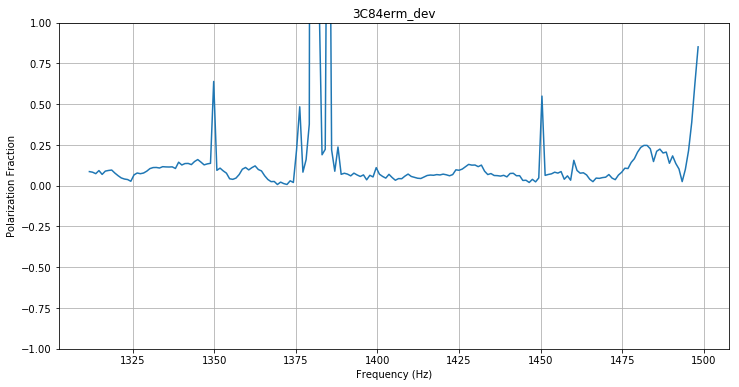

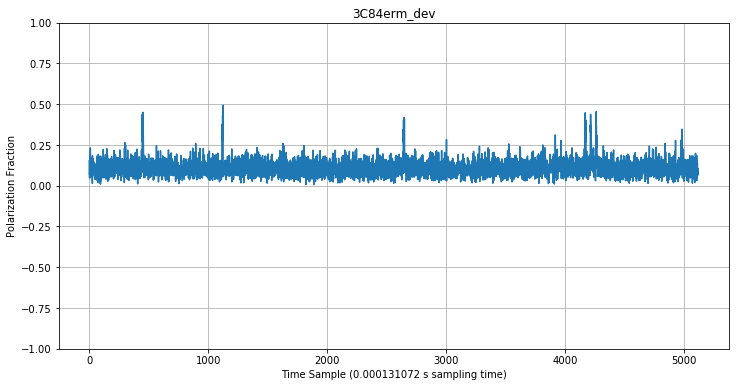

0.11044542170477178


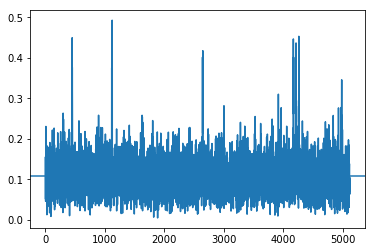

In [121]:
leakages = dict()
plt.figure()
for s in obs.keys():
    source =str(s)
    leakages[source] = dict()
    for o in obs[s]:
        print(source,o)
        if source+o in bad_obs :
            print("Bad observation, skipping")
            continue
        
        #Get IQUV
        datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/' + source + '_22-06-15/'
        source_name = source
        obs_name = o
        suffix='_dev'
        n_t=1
        n_f=32
        nsamps=5120#5120
        deg=10

        label = source_name + obs_name + suffix
        sdir = datadir + label
        (I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
        (I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True,normalize=False)
        (I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True,normalize=False)

        #Calibrate
        (I_cal,Q_cal,U_cal,V_cal) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
        
        #Get polarization fraction
        (pol_f,pol_t,avg_frac)=dsapol.get_pol_fraction(I_cal,Q_cal,U_cal,V_cal,-1,fobj.header.tsamp,n_t,n_f,freq_test,datadir=datadir,label=label,pre_calc_tf=False,plot=True,show=True,normalize=False)
        #pol_t = np.mean(np.sqrt(Q_cal**2 + U_cal**2 + V_cal**2),axis=0)/np.mean(I_cal,axis=0)
        avg_frac = np.nanmean(pol_t)
        sigma_frac = np.sqrt(np.mean((pol_t-avg_frac)**2))
        print(avg_frac)
        #Compare to true fraction to get leakage (fraction)
        leakage = (pol_t - pols[source])#/pols[source]
        avg_leakage = (avg_frac - pols[source])#/pols[source]
        
        leakages[source][o] = (avg_frac,sigma_frac,avg_leakage,leakage)
        p1 =plt.plot(leakage,label=source+o)
        plt.axhline(avg_leakage,color=p1[0].get_color())

(0.20136437714816152, 0.08933571768271177, 0.19736437714816152)
(0.12183109437430026, 0.053235791233494825, 0.11783109437430025)
(0.08667984335116666, 0.03727987053306315, 0.08267984335116665)
(0.08604180503113432, 0.033201790156942454, 0.08504180503113432)
(0.07053109550168912, 0.029660760569573667, 0.06953109550168912)
(0.09369713608390459, 0.04083754572567816, 0.09269713608390459)
(0.1290449700566681, 0.056609229232690156, 0.1280449700566681)
(0.15503075227111923, 0.07823488852141511, 0.15403075227111923)
(0.11044542170477178, 0.050174298554788055, 0.10944542170477178)
0.11718516616921286 0.038521084026753


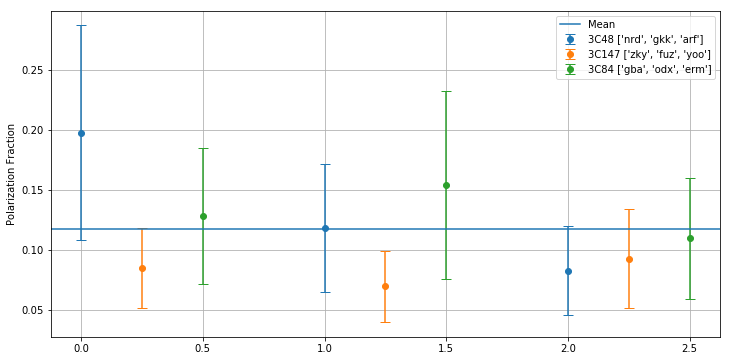

In [122]:
plt.figure(figsize=(12,6))
i = 0
fracs_all = []
leaks_all = []
for key in leakages.keys():
    fracs = []
    frac_errs = []
    leaks = []
    if key == '3C196' or key == '3C286' or key == '3C295':
        continue
    for o in leakages[key].keys():
        print(leakages[key][o][0:3])
        fracs.append(leakages[key][o][0])
        leaks.append(leakages[key][o][2])
        fracs_all.append(leakages[key][o][0])
        leaks_all.append(leakages[key][o][2])
        frac_errs.append(leakages[key][o][1])
    plt.errorbar(i+np.arange(len(leakages[key].keys())),leaks,yerr=frac_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))    
    i+= 0.25
plt.grid()
plt.axhline(np.mean(fracs_all),label='Mean')
print(np.mean(fracs_all),np.sqrt(np.mean((fracs_all-np.mean(fracs_all))**2)))
plt.ylabel("Polarization Fraction")
plt.legend()
plt.savefig('/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/' + "CALFRACTIONS.pdf")
plt.show()

In [123]:
print(obs.keys())

dict_keys(['3C48', '3C147', '3C196', '3C286', '3C295', '3C84'])


3C48 nrd
Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22-06-15/3C48nrd_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48_22

Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C84_22-06-15/3C84odx_dev_3.fil
Binning by 1 in time
Binning by 32 in frequency
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
3C84 erm
Reading stok

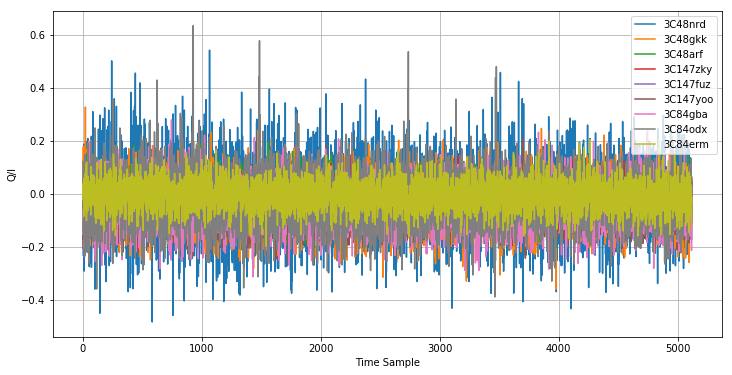

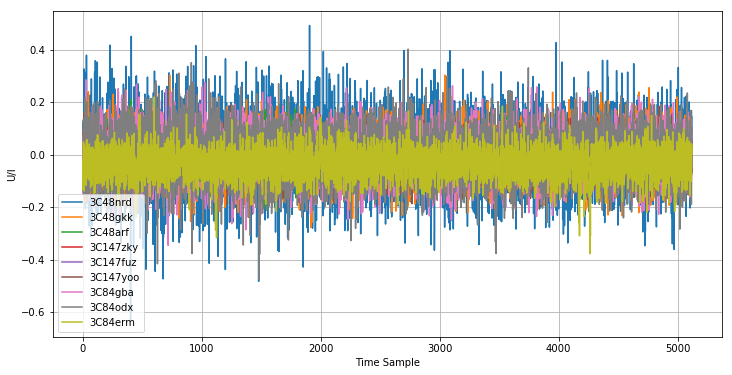

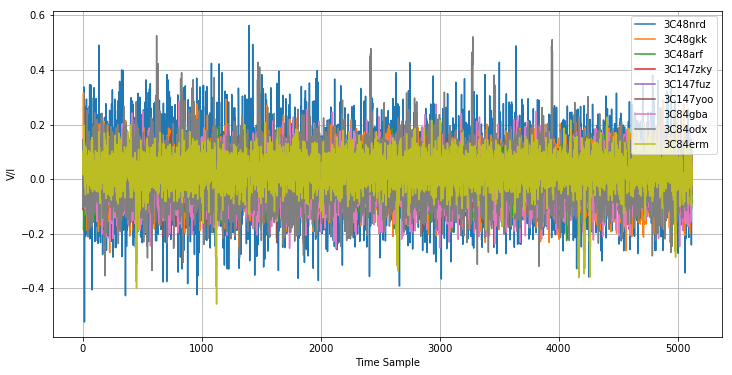

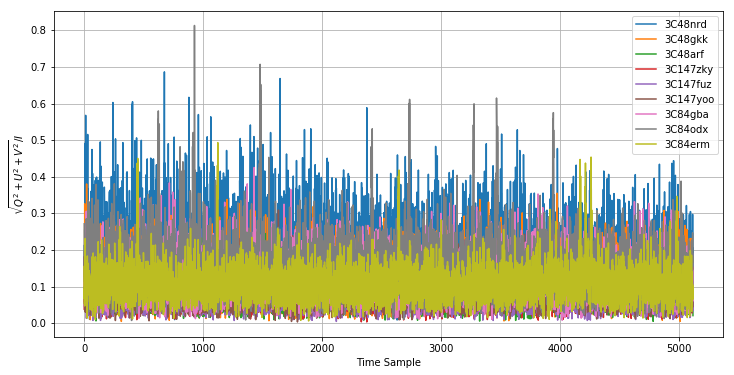

In [128]:
#Just get Q/I, U/I, U/I leakages
leakages = dict()
fQ,axQ = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
fU,axU = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
fV,axV = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
ff,axf = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
for s in obs.keys():
    source =str(s)
    leakages[source] = dict()
    for o in obs[s]:
        leakages[source][o] = dict()
        print(source,o)
        if source+o in bad_obs or source == '3C295':
            print("Bad observation, skipping")
            continue
        
        #Get IQUV
        datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/' + source + '_22-06-15/'
        source_name = source
        obs_name = o
        suffix='_dev'
        n_t=1
        n_f=32
        nsamps=5120#5120
        deg=10

        label = source_name + obs_name + suffix
        sdir = datadir + label
        (I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
        (I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,normalize=False)
        (I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,normalize=False)

        #Calibrate
        (I_cal,Q_cal,U_cal,V_cal) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
        (I_f_cal,Q_f_cal,U_f_cal,V_f_cal) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,normalize=False)
        (I_t_cal,Q_t_cal,U_t_cal,V_t_cal) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,normalize=False)

        
        #Get polarization fraction
        (pol_f,pol_t,avg_frac)=dsapol.get_pol_fraction(I_cal,Q_cal,U_cal,V_cal,-1,fobj.header.tsamp,n_t,n_f,freq_test,datadir=datadir,label=label,pre_calc_tf=False,plot=False,show=False,normalize=False)
        #pol_t = np.mean(np.sqrt(Q_cal**2 + U_cal**2 + V_cal**2),axis=0)/np.mean(I_cal,axis=0)
        avg_frac = np.nanmean(pol_t)
        sigma_frac = np.sqrt(np.mean((pol_t-avg_frac)**2))
        leakages[source][o]["f"] = (avg_frac,sigma_frac)
        """"
        print(avg_frac)
        #Compare to true fraction to get leakage (fraction)
        leakage = (pol_t - pols[source])#/pols[source]
        avg_leakage = (avg_frac - pols[source])#/pols[source]
        
        leakages[source][o] = (avg_frac,sigma_frac,avg_leakage,leakage)
        p1 =plt.plot(leakage,label=source+o)
        plt.axhline(avg_leakage,color=p1[0].get_color())
        """
        leakage_Q = Q_t_cal/I_t_cal
        leakage_U = U_t_cal/I_t_cal
        leakage_V = V_t_cal/I_t_cal
        #leakage[source][obs_name]["Q"] = np.nan_to_num(leakage_Q,nan=np.nanmean(leakage_Q))
        #leakage[source][obs_name]["U"] = np.nan_to_num(leakage_U,nan=np.nanmean(leakage_U))
        #leakage[source][obs_name]["V"] = np.nan_to_num(leakage_V,nan=np.nanmean(leakage_V))
    
        axQ.plot(leakage_Q,label=source_name + obs_name)
        axV.plot(leakage_V,label=source_name + obs_name)
        axU.plot(leakage_U,label=source_name + obs_name)
        axf.plot(pol_t,label=source_name + obs_name)
        
        avg_Q_mag = np.nanmean(np.abs(leakage_Q))
        avg_Q = np.nanmean((leakage_Q))
        sigma_Q = np.sqrt(np.mean((leakage_Q-avg_Q)**2))
        leakages[source][o]["Q"] = (avg_Q_mag,sigma_Q)
        
        avg_U_mag = np.nanmean(np.abs(leakage_U))
        avg_U = np.nanmean((leakage_U))
        sigma_U = np.sqrt(np.mean((leakage_U-avg_U)**2))
        leakages[source][o]["U"] = (avg_U_mag,sigma_U)
        
        avg_V_mag = np.nanmean(np.abs(leakage_V))
        avg_V = np.nanmean((leakage_V))
        sigma_V = np.sqrt(np.mean((leakage_V-avg_V)**2))
        leakages[source][o]["V"] = (avg_V_mag,sigma_V)
        
        
        
axQ.set_ylabel("Q/I")
axU.set_ylabel("U/I")
axV.set_ylabel("V/I")
axf.set_ylabel(r'$\sqrt{Q^2 + U^2 + V^2}/I$')

axQ.set_xlabel("Time Sample")
axU.set_xlabel("Time Sample")
axV.set_xlabel("Time Sample")
axf.set_xlabel("Time Sample")

axQ.legend()
axU.legend()
axV.legend()
axf.legend()


axQ.grid()
axU.grid()
axV.grid()
axf.grid()

#plt.grid()
plt.show()

<Figure size 864x432 with 0 Axes>

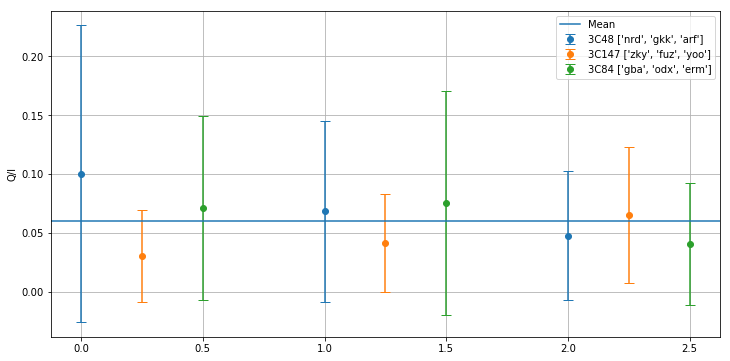

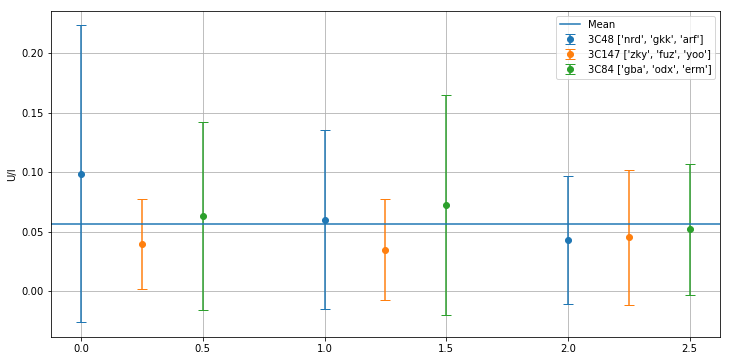

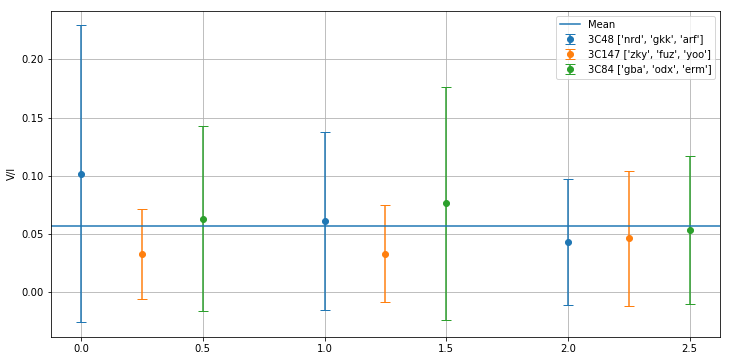

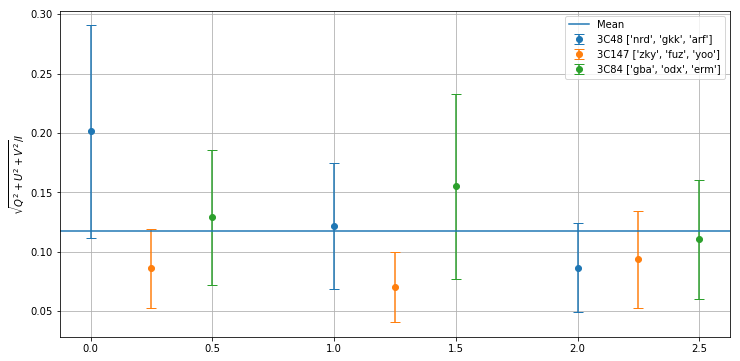

'\nplt.grid()\nplt.show()\n     \nplt.grid()\n\nprint(np.mean(fracs_all),np.sqrt(np.mean((fracs_all-np.mean(fracs_all))**2)))\nplt.ylabel("Polarization Fraction")\nplt.legend()\nplt.savefig(\'/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/\' + "CALFRACTIONS.pdf")\nplt.show()\n'

In [129]:
plt.figure(figsize=(12,6))
i = 0
fracs_all = []
leaks_all = []
fQ,axQ = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
fU,axU = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
fV,axV = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
ff,axf = plt.subplots(nrows=1,ncols=1,figsize=(12,6))#plt.figure(figsize=(12,6))
Qall = []
Uall = []
Vall = []
fall = []
for key in leakages.keys():
    Qs = []
    Q_errs = []
    
    Us = []
    U_errs = []
    
    Vs = []
    V_errs = []
    
    fs = []
    f_errs = []
    if key == '3C196' or key == '3C286' or key == '3C295':
        continue
    for o in leakages[key].keys():
        """
        print(leakages[key][o][0:3])
        fracs.append(leakages[key][o][0])
        leaks.append(leakages[key][o][2])
        fracs_all.append(leakages[key][o][0])
        leaks_all.append(leakages[key][o][2])
        frac_errs.append(leakages[key][o][1])
        """
        Qs.append(leakages[key][o]["Q"][0])
        Qall.append(leakages[key][o]["Q"][0])
        Q_errs.append(leakages[key][o]["Q"][1])
        
        Us.append(leakages[key][o]["U"][0])
        Uall.append(leakages[key][o]["U"][0])
        U_errs.append(leakages[key][o]["U"][1])
        
        Vs.append(leakages[key][o]["V"][0])
        Vall.append(leakages[key][o]["V"][0])
        V_errs.append(leakages[key][o]["V"][1])
        
        fs.append(leakages[key][o]["f"][0])
        fall.append(leakages[key][o]["f"][0])
        f_errs.append(leakages[key][o]["f"][1])
        
    axQ.errorbar(i+np.arange(len(leakages[key].keys())),Qs,yerr=Q_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))  
    axU.errorbar(i+np.arange(len(leakages[key].keys())),Us,yerr=U_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))  
    axV.errorbar(i+np.arange(len(leakages[key].keys())),Vs,yerr=V_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))  
    axf.errorbar(i+np.arange(len(leakages[key].keys())),fs,yerr=f_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))  
    #plt.errorbar(i+np.arange(len(leakages[key].keys())),leaks,yerr=frac_errs,fmt='o',capsize=5,label=key + " " + str(list(leakages[key].keys())))    
    
    i+= 0.25
axQ.set_ylabel("Q/I")
axU.set_ylabel("U/I")
axV.set_ylabel("V/I")
axf.set_ylabel(r'$\sqrt{Q^2 + U^2 + V^2}/I$')

axQ.axhline(np.mean(Qall),label='Mean')
axU.axhline(np.mean(Uall),label='Mean')
axV.axhline(np.mean(Vall),label='Mean')
axf.axhline(np.mean(fall),label='Mean')

#axQ.set_xlabel("Time Sample")
#axU.set_xlabel("Time Sample")
#axV.set_xlabel("Time Sample")

axQ.legend()
axU.legend()
axV.legend()
axf.legend()

axQ.grid()
axU.grid()
axV.grid()
axf.grid()

fQ.savefig("Q_leakage.pdf")
fU.savefig("U_leakage.pdf")
fV.savefig("V_leakage.pdf")
ff.savefig("tot_leakage.pdf")

plt.show()
"""
plt.grid()
plt.show()
     
plt.grid()

print(np.mean(fracs_all),np.sqrt(np.mean((fracs_all-np.mean(fracs_all))**2)))
plt.ylabel("Polarization Fraction")
plt.legend()
plt.savefig('/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/' + "CALFRACTIONS.pdf")
plt.show()
"""


In [130]:
np.mean(Qall),np.mean(Uall),np.mean(Vall),np.mean(fall)

(0.060501702, 0.05647846, 0.05680533, 0.11718516616921286)

In [131]:
np.std(Qall),np.std(Uall),np.std(Vall),np.std(fall)

(0.020556377, 0.018786404, 0.020842377, 0.038521084026753)

# Updated Estimate (Error Propagation)

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_3.fil
Binning by 1 in time
Binning by 32 in frequency


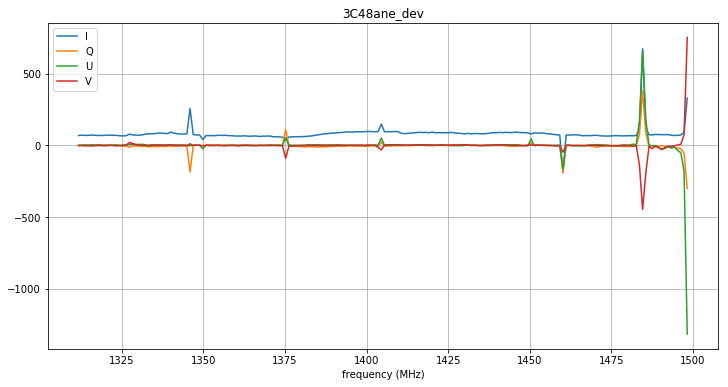

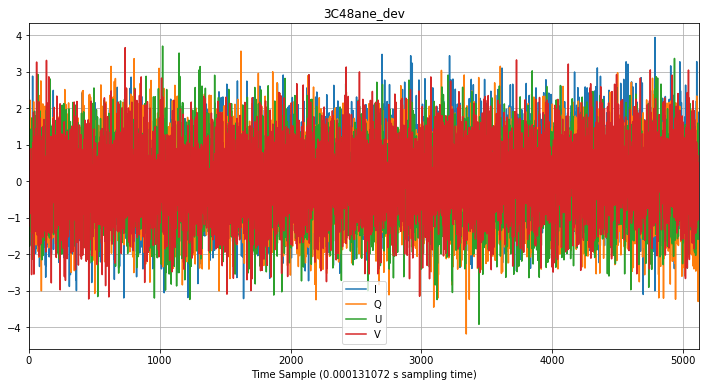

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)


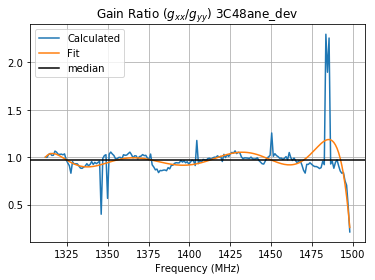

In [15]:
#gain
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/'
source_name = '3C48'
obs_name = 'ane'
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
#(I,Q,U,V) = (I/np.std(I[:,:],axis=1,keepdims=True),Q/np.std(Q[:,:],axis=1,keepdims=True),U/np.std(U[:,:],axis=1,keepdims=True),V/np.std(V[:,:],axis=1,keepdims=True))
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
ratio_raw,ratio_fit_params = dsapol.gaincal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)

ratio_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    ratio_fit += ratio_fit_params[i]*(freq_test[0]**(deg-i))
ratio = ratio_fit

"""
I_err_f = []
for i in range(len(I_f)):
        I_err_f.append(np.sqrt(np.mean((I[i,:]/np.std(I[i,:]) - np.mean(I[i,:]))**2)))
I_err_f = np.array(I_err_f)

Q_err_f = []
for i in range(len(Q_f)):
        Q_err_f.append(np.sqrt(np.mean((Q[i,:]/np.std(Q[i,:]) - np.mean(Q[i,:]))**2)))
Q_err_f = np.array(Q_err_f)

U_err_f = []
for i in range(len(U_f)):
        U_err_f.append(np.sqrt(np.mean((U[i,:]/np.std(U[i,:]) - np.mean(U[i,:]))**2)))
U_err_f = np.array(U_err_f)

V_err_f = []
for i in range(len(V_f)):
        #V_err_f.append(np.sqrt(np.mean(((V[i,:] - V_f[i])/np.std(V[i,:]))**2)))
        V_err_f.append(np.sqrt(np.mean((V[i,:]/np.std(V[i,:]) - np.mean(V[i,:]))**2)))
V_err_f = np.array(V_err_f)
"""
I_err_f = I.std(1)/np.sqrt(I.shape[1])
Q_err_f = Q.std(1)/np.sqrt(Q.shape[1])
U_err_f = U.std(1)/np.sqrt(U.shape[1])
V_err_f = V.std(1)/np.sqrt(V.shape[1])


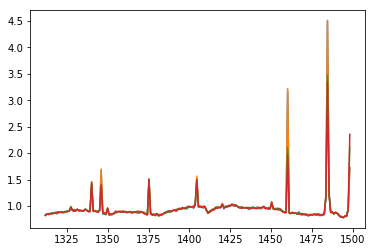

In [16]:
#Error in I,Q,U,V vs freq
plt.figure()
plt.plot(freq_test[0],I_err_f)
plt.plot(freq_test[0],Q_err_f)
plt.plot(freq_test[0],U_err_f)
plt.plot(freq_test[0],V_err_f)
plt.show()


In [17]:
I.shape

(192, 5120)

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(0, 5)

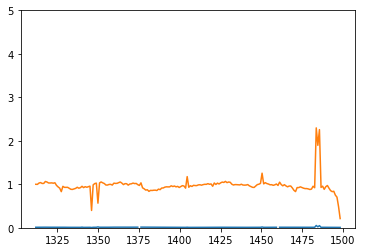

In [18]:
#Error in ratio vs freq
ratio_err = np.sqrt((((I_f - Q_f)/(I_f + Q_f))/((I_f - Q_f)**4))*(((I_err_f*Q_f)**2) + ((Q_err_f*I_f)**2)))##np.sqrt(((I_f-Q_f)/((I_f+Q_f)**5))*(((Q_f*I_err_f)**2) + ((I_f*Q_err_f)**2)))
plt.plot(freq_test[0],ratio_err)
plt.plot(freq_test[0],ratio_raw)
plt.ylim(0,5)

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_3.fil
Binning by 1 in time
Binning by 32 in fr

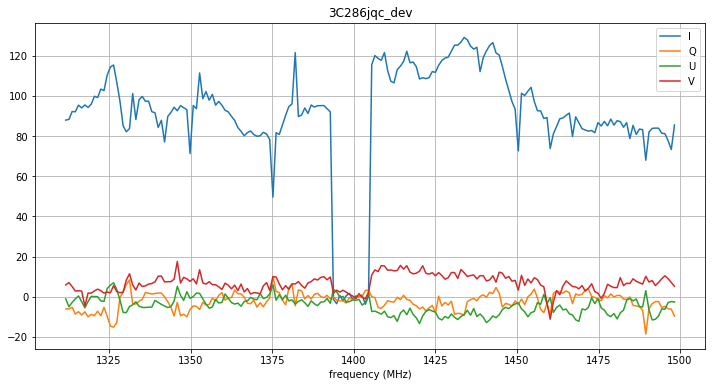

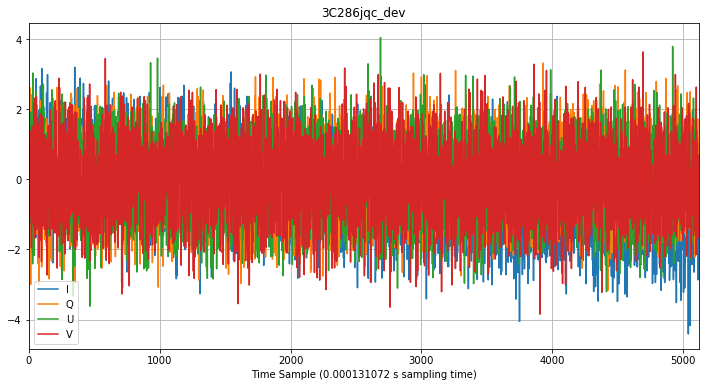

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)


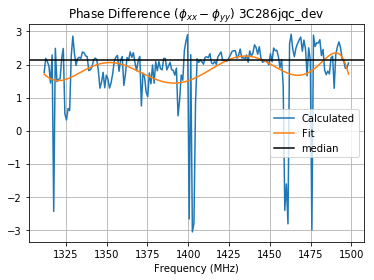

In [19]:
#Error in phasediff vs freq
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/'
source_name = '3C286'
obs_name = 'jqc'
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
#(I,Q,U,V) = (I/np.std(I[:,:],axis=1,keepdims=True),Q/np.std(Q[:,:],axis=1,keepdims=True),U/np.std(U[:,:],axis=1,keepdims=True),V/np.std(V[:,:],axis=1,keepdims=True))
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
phase_raw,phase_fit_params = dsapol.phasecal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)
phase_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    phase_fit += phase_fit_params[i]*(freq_test[0]**(deg-i))
phase = phase_fit
"""
I_err_f = []
for i in range(len(I_f)):
        I_err_f.append(np.sqrt(np.mean((I[i,:]/np.std(I[i,:]) - np.mean(I[i,:]))**2)))
I_err_f = np.array(I_err_f)

Q_err_f = []
for i in range(len(Q_f)):
        Q_err_f.append(np.sqrt(np.mean((Q[i,:]/np.std(Q[i,:]) - np.mean(Q[i,:]))**2)))
Q_err_f = np.array(Q_err_f)

U_err_f = []
for i in range(len(U_f)):
        U_err_f.append(np.sqrt(np.mean((U[i,:]/np.std(U[i,:]) - np.mean(U[i,:]))**2)))
U_err_f = np.array(U_err_f)

V_err_f = []
for i in range(len(V_f)):
        #V_err_f.append(np.sqrt(np.mean(((V[i,:] - V_f[i])/np.std(V[i,:]))**2)))
        V_err_f.append(np.sqrt(np.mean((V[i,:]/np.std(V[i,:]) - np.mean(V[i,:]))**2)))
V_err_f = np.array(V_err_f)
"""
I_err_f = I.std(1)/np.sqrt(I.shape[1])
Q_err_f = Q.std(1)/np.sqrt(Q.shape[1])
U_err_f = U.std(1)/np.sqrt(U.shape[1])
V_err_f = V.std(1)/np.sqrt(V.shape[1])


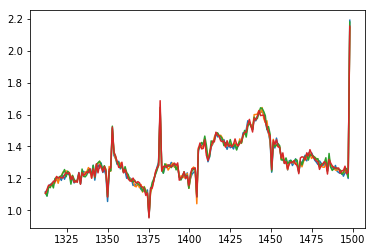

In [20]:
#Error in I,Q,U,V vs freq
plt.figure()
plt.plot(freq_test[0],I_err_f)
plt.plot(freq_test[0],Q_err_f)
plt.plot(freq_test[0],U_err_f)
plt.plot(freq_test[0],V_err_f)
plt.show()


1.6877441


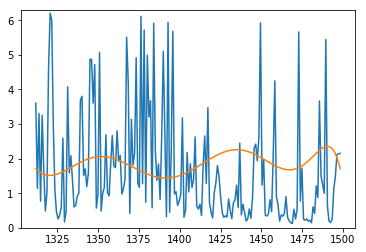

In [21]:
phase_err = np.sqrt(((1 + ((V_f/U_f)**2))**2)*(((V_f*U_err_f/(U_f**2))**2) + ((V_err_f/U_f)**2)))#%(2*np.pi)##np.sqrt(((1/(1 + (V_f/U_f)**2))**2)*(((V_f*U_err_f/(U_f**2))**2) + ((V_err_f/U_f)**2)))
plt.plot(freq_test[0],phase_err%(2*np.pi))
plt.plot(freq_test[0],phase%(2*np.pi))
plt.ylim(0,2*np.pi)
print(np.mean(phase_err%(2*np.pi)))



In [22]:
#Want ratio and phase error vs time, constant
ratio_err = np.sqrt(np.nansum(ratio_err**2)/len(ratio_err))
phase_err = np.sqrt(np.nansum(ratio_err**2)/len(phase_err))

In [23]:
np.nanmean(ratio),np.nanmean(ratio_err),np.nanmean(phase),np.nanmean(phase_err)

(0.973303476969401,
 0.01285475248407345,
 1.8556600014368694,
 0.0009277118508807271)

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights

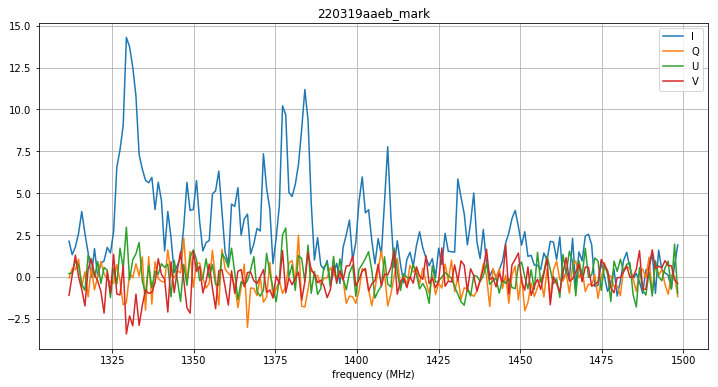

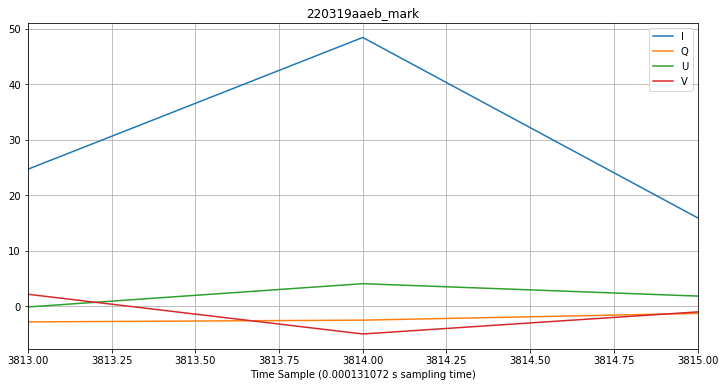

In [24]:
#Get error in Mark I,Q,U,V
#Simulate calibrated I,Q,U,V to get errors
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/'
label="220319aaeb_mark"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

trials = 100
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,'220319aaeb_dev',nsamps,n_t=n_t,n_f=n_f,n_off=3000,sub_offpulse_mean=True)#("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/","220319aaeb_dev",5120,n_f=32)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
peak,timestart,timestop=dsapol.find_peak(I, 1, fobj.header.tsamp)
I_err_t = I[:,:].std(0)/np.sqrt(I.shape[0])
Q_err_t = Q[:,:].std(0)/np.sqrt(Q.shape[0])
U_err_t = U[:,:].std(0)/np.sqrt(U.shape[0])
V_err_t = V[:,:].std(0)/np.sqrt(V.shape[0])


(3813, 3815)

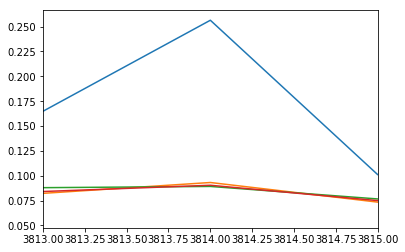

In [25]:
plt.figure()
plt.plot(I_err_t)
plt.plot(Q_err_t)
plt.plot(U_err_t)
plt.plot(V_err_t)
plt.xlim(timestart,timestop)

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


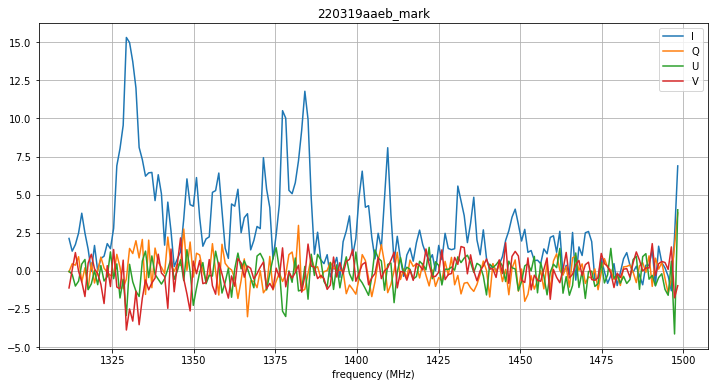

(3813, 3815)

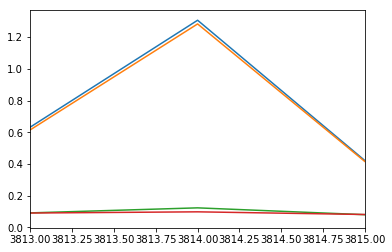

In [26]:
I_err_t_MARK = np.sqrt(  ((2*(I_t + Q_t)*ratio_err)/(np.nanmean(ratio)**3))**2 +  ((0.5*((1/np.nanmean(ratio)**2) + 1)*I_err_t))**2  + ((0.5*((1/np.nanmean(ratio)**2) - 1)*Q_err_t))**2 )
#I_err_f_MARK = np.sqrt( ((0.5*((1/ratio**2) - 1)*Q_err_f))**2 )
Q_err_t_MARK = np.sqrt(  ((2*(I_t + Q_t)*ratio_err)/(np.nanmean(ratio)**3))**2  +  ((0.5*((1/np.nanmean(ratio)**2) - 1)*I_err_t))**2  + ((0.5*((1/np.nanmean(ratio)**2) + 1)*Q_err_t))**2 )
U_err_t_MARK = np.sqrt(  (phase_err*(-U_t*np.sin(np.nanmean(phase)) + V_t*np.cos(np.nanmean(phase)))/np.nanmean(ratio))**2   + (ratio_err*(U_t*np.cos(np.nanmean(phase)) + V_t*np.sin(np.nanmean(phase)))/(np.nanmean(ratio)**2))**2  + (U_err_t*np.cos(np.nanmean(phase))/np.nanmean(ratio))**2 + (V_err_t*np.sin(np.nanmean(phase))/np.nanmean(ratio))**2 )
V_err_t_MARK = np.sqrt(  (phase_err*(-V_t*np.sin(np.nanmean(phase)) - U_t*np.cos(np.nanmean(phase)))/np.nanmean(ratio))**2   + (ratio_err*(-V_t*np.cos(np.nanmean(phase)) + U_t*np.sin(np.nanmean(phase)))/(np.nanmean(ratio)**2))**2  + (U_err_t*np.sin(np.nanmean(phase))/np.nanmean(ratio))**2 + (V_err_t*np.cos(np.nanmean(phase))/np.nanmean(ratio))**2 )

(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio,phase%(2*np.pi))
(I_cal,Q_cal,V_cal,U_cal) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
(I_cal_f,Q_cal_f,U_cal_f,V_cal_f) = dsapol.get_stokes_vs_freq(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_cal_t,Q_cal_t,U_cal_t,V_cal_t) = dsapol.get_stokes_vs_time(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False)


plt.figure()
plt.plot(I_err_t_MARK)
plt.plot(Q_err_t_MARK)
plt.plot(U_err_t_MARK)
plt.plot(V_err_t_MARK)
plt.xlim(timestart,timestop)



0.1613036720298332


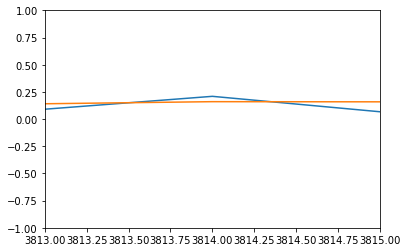

In [27]:
#polarization error
pol_t_err = np.sqrt(((I_err_t_MARK/I_cal_t)*np.sqrt(Q_cal_t**2 + U_cal_t**2 + V_cal_t**2))**2 + (1/(Q_cal_t**2 + U_cal_t**2 + V_cal_t**2))*((Q_err_t_MARK*Q_cal_t/I_cal_t)**2 + (U_err_t_MARK*U_t/I_cal_t)**2 + (V_err_t_MARK*V_t/I_cal_t)**2))
avg_pol_t_err = np.sqrt(np.nansum(pol_t_err[timestart:timestop]**2)/(timestop-timestart))
#pol_f_err = np.sqrt(((I_err_f/I_f)*np.sqrt(Q_f**2 ))**2 + (1/(Q_f**2 ))*((Q_err_f*Q_f)**2))
p_f,p_t,avg = dsapol.get_pol_fraction(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)

#plt.figure()
#plt.plot(freq_test[0],pol_f_err)    
#plt.ylim(0,1)

#avg_pol_f_err = np.sqrt(np.nansum(pol_f_err**2))
print(avg_pol_t_err)
plt.figure()
plt.plot(pol_t_err)
plt.plot(p_t)
plt.xlim(timestart,timestop)
plt.ylim(-1,1)
plt.show()

In [28]:
avg_1 = avg
avg_err_1 = avg_pol_t_err
upp_1 = norm.isf(0.05,avg,avg_pol_t_err)

0.1613036720298332
0.41584344234602594
0.15052251236716396
0.1613036720298332
0.41584344234602594
0.15052251236716396


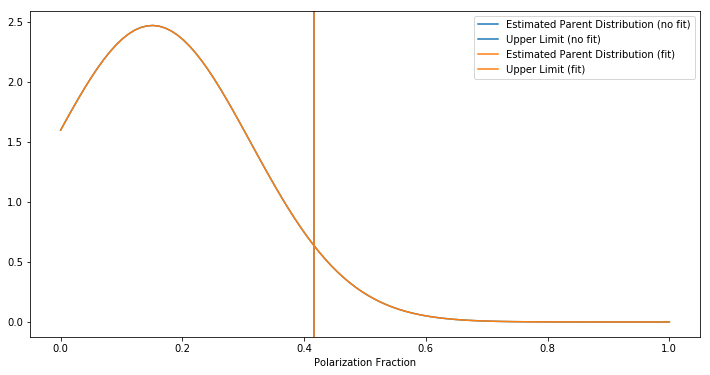

In [29]:
plt.figure(figsize=(12,6))
p1=plt.plot(np.linspace(0,1,100),norm.pdf(np.linspace(0,1,100),avg_1,avg_err_1),label="Estimated Parent Distribution (no fit)")
plt.axvline(norm.isf(0.05,avg_1,avg_err_1),color=p1[0].get_color(),label="Upper Limit (no fit)")
p2=plt.plot(np.linspace(0,1,100),norm.pdf(np.linspace(0,1,100),avg,avg_pol_t_err),label="Estimated Parent Distribution (fit)")
plt.axvline(norm.isf(0.05,avg,avg_pol_t_err),color=p2[0].get_color(),label="Upper Limit (fit)")

plt.xlabel("Polarization Fraction")
plt.legend()
print(avg_pol_t_err)
print(norm.isf(0.05,avg,avg_pol_t_err))
print(avg)
print(avg_err_1)
print(norm.isf(0.05,avg_1,avg_err_1))
print(avg_1)


# Old

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights

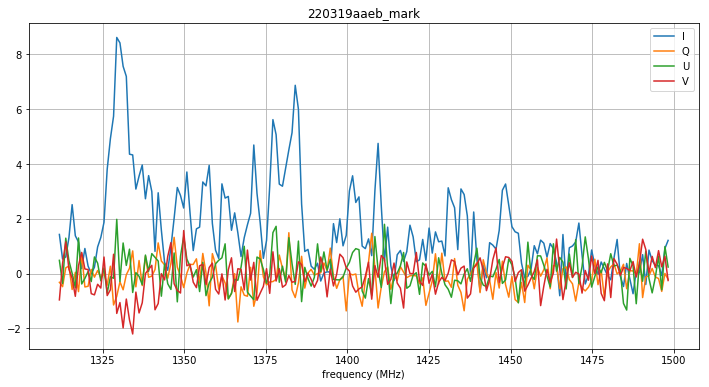

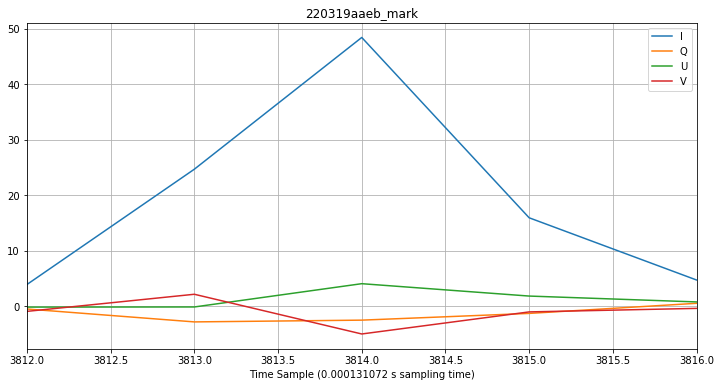

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


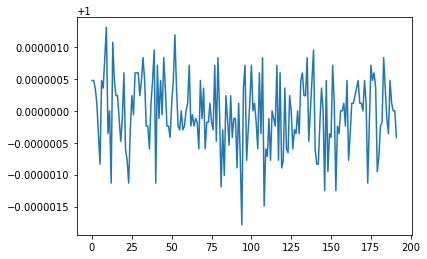

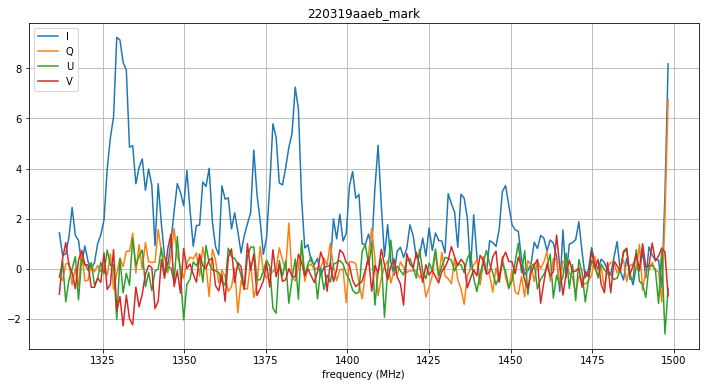

In [207]:
#Get error in Mark I,Q,U,V
#Simulate calibrated I,Q,U,V to get errors
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/'
label="220319aaeb_mark"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

trials = 100
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,'220319aaeb_dev',nsamps,n_t=n_t,n_f=n_f,n_off=3000,sub_offpulse_mean=True)#("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/","220319aaeb_dev",5120,n_f=32)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True)
peak,timestart,timestop=dsapol.find_peak(I, 1, fobj.header.tsamp)

"""
I_err_f = []
for i in range(len(I_f)):
        I_err_f.append(np.sqrt(np.mean((I[i,:]/np.std(I[i,:]) - np.mean(I[i,:]))**2)))
I_err_f = np.array(I_err_f)

Q_err_f = []
for i in range(len(Q_f)):
        Q_err_f.append(np.sqrt(np.mean((Q[i,:]/np.std(Q[i,:]) - np.mean(Q[i,:]))**2)))
Q_err_f = np.array(Q_err_f)

U_err_f = []
for i in range(len(U_f)):
        U_err_f.append(np.sqrt(np.mean((U[i,:]/np.std(U[i,:]) - np.mean(U[i,:]))**2)))
U_err_f = np.array(U_err_f)

V_err_f = []
for i in range(len(V_f)):
        #V_err_f.append(np.sqrt(np.mean(((V[i,:] - V_f[i])/np.std(V[i,:]))**2)))
        V_err_f.append(np.sqrt(np.mean((V[i,:]/np.std(V[i,:]) - np.mean(V[i,:]))**2)))
V_err_f = np.array(V_err_f)
"""
#I_err_f = I[:,timestart:timestop].std(1)
#Q_err_f = Q[:,timestart:timestop].std(1)
#U_err_f = U[:,timestart:timestop].std(1)
#V_err_f = V[:,timestart:timestop].std(1)

I_err_f = I[:,:3000].std(1)
Q_err_f = Q[:,:3000].std(1)
U_err_f = U[:,:3000].std(1)
V_err_f = V[:,:3000].std(1)
plt.plot(I[:,:3000].std(1))

(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio,phase%(2*np.pi))
(I_cal,Q_cal,V_cal,U_cal) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
(I_cal_f,Q_cal_f,U_cal_f,V_cal_f) = dsapol.get_stokes_vs_freq(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
(I_cal_t,Q_cal_t,U_cal_t,V_cal_t) = dsapol.get_stokes_vs_time(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False)



In [165]:
np.nanmean(ratio_err[ratio_err<1])

0.8111411

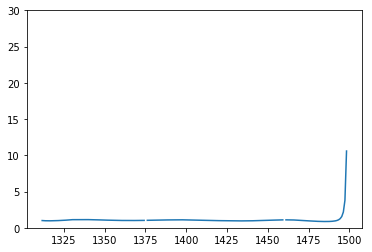

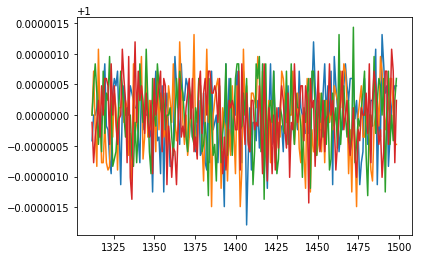

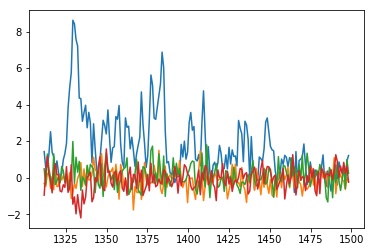

0.9892911 1.0026056 0.9882507 0.99045473


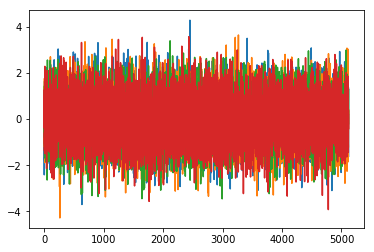

In [208]:
#error in calibrated IQUV
"""
I_err_f_MARK = np.sqrt(   ((ratio_err*ratio*(I_cal_f+Q_cal_f))**2)  + ((I_err_f*0.5*(1+ratio))**2) +  ((Q_err_f*0.5*(-1+ratio))**2)  )
Q_err_f_MARK = np.sqrt(   ((ratio_err*ratio*(I_cal_f+Q_cal_f))**2)  + ((I_err_f*0.5*(-1+ratio))**2) +  ((Q_err_f*0.5*(1+ratio))**2)  )
U_err_f_MARK = np.sqrt(   ((phase_err*(-U_cal_f*np.sin(phase)  + V_cal_f*np.cos(phase)))**2)    +  ((U_err_f*np.cos(phase))**2) + ((V_err_f*np.sin(phase))**2))
V_err_f_MARK = np.sqrt(   ((phase_err*(V_cal_f*np.sin(phase)  + U_cal_f*np.cos(phase)))**2)    +  ((U_err_f*np.sin(phase))**2) + ((V_err_f*np.cos(phase))**2))
"""
I_err_f_MARK = np.sqrt(  ((2*(I_f + Q_f)*ratio_err)/(ratio**3))**2 +  ((0.5*((1/ratio**2) + 1)*I_err_f))**2  + ((0.5*((1/ratio**2) - 1)*Q_err_f))**2 )
#I_err_f_MARK = np.sqrt( ((0.5*((1/ratio**2) - 1)*Q_err_f))**2 )
Q_err_f_MARK = np.sqrt(  ((2*(I_f + Q_f)*ratio_err)/(ratio**3))**2  +  ((0.5*((1/ratio**2) - 1)*I_err_f))**2  + ((0.5*((1/ratio**2) + 1)*Q_err_f))**2 )
U_err_f_MARK = np.sqrt(  (phase_err*(-U_f*np.sin(phase) + V_f*np.cos(phase))/ratio)**2   + (ratio_err*(U_f*np.cos(phase) + V_f*np.sin(phase))/(ratio**2))**2  + (U_err_f*np.cos(phase)/ratio)**2 + (V_err_f*np.sin(phase)/ratio)**2 )
V_err_f_MARK = np.sqrt(  (phase_err*(-V_f*np.sin(phase) - U_f*np.cos(phase))/ratio)**2   + (ratio_err*(-V_f*np.cos(phase) + U_f*np.sin(phase))/(ratio**2))**2  + (U_err_f*np.sin(phase)/ratio)**2 + (V_err_f*np.cos(phase)/ratio)**2 )


#V_err_f_MARK = np.sqrt(  (phase_err*(-V_cal_f*np.sin(phase) - U_cal_f*np.cos(phase))/ratio)**2     (ratio_err*(-V_cal_f*np.cos(phase) + U_cal_f*np.sin(phase))/(ratio**2))**2 + (U_err_f*np.sin(phase)/ratio)**2 + (V_err_f*np.cos(phase)/ratio)**2 )
plt.figure()
plt.plot(freq_test[0],I_err_f_MARK)
#plt.plot(freq_test[0],Q_err_f_MARK)
#plt.plot(freq_test[0],U_err_f_MARK)
#plt.plot(freq_test[0],V_err_f_MARK)
plt.ylim(0,30)
plt.show()


plt.figure()
plt.plot(freq_test[0],I_err_f)
plt.plot(freq_test[0],Q_err_f)
plt.plot(freq_test[0],U_err_f)
plt.plot(freq_test[0],V_err_f)
plt.show()
#plt.ylim(-5,50)

plt.figure()
plt.plot(freq_test[0],I_f)
plt.plot(freq_test[0],Q_f)
plt.plot(freq_test[0],U_f)
plt.plot(freq_test[0],V_f)
plt.show()
#plt.ylim(-5,50)

plt.figure()
plt.plot(I[0,:])
plt.plot(Q[0,:])
plt.plot(U[0,:])
plt.plot(V[0,:])
print(np.std(I[0,:]),np.std(Q[0,:]),np.std(U[0,:]),np.std(V[0,:]))


1.0919417


(-10, 1)

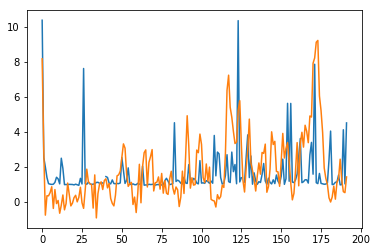

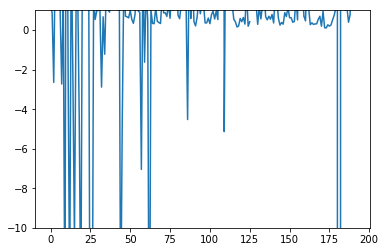

In [209]:
print(np.nanmean(Q_f**2 + U_f**2 + V_f**2))
plt.plot(np.sqrt((1/(Q_cal_f**2 + U_cal_f**2 + V_cal_f**2))*((Q_err_f_MARK*Q_cal_f)**2 + (U_err_f_MARK*U_f)**2 + (V_err_f_MARK*V_f)**2)))
plt.plot(I_cal_f)
plt.figure()
plt.plot(np.sqrt((1/(Q_cal_f**2 + U_cal_f**2 + V_cal_f**2))*((Q_err_f_MARK*Q_cal_f)**2 + (U_err_f_MARK*U_f)**2 + (V_err_f_MARK*V_f)**2))/I_cal_f)
plt.ylim(-10,1)

1007.9765166724228


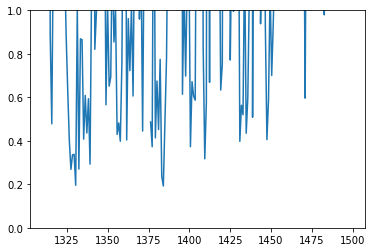

In [213]:
#polarization error
pol_f_err = np.sqrt(((I_err_f_MARK/I_cal_f)*np.sqrt(Q_cal_f**2 + U_cal_f**2 + V_cal_f**2))**2 + (1/(Q_cal_f**2 + U_cal_f**2 + V_cal_f**2))*((Q_err_f_MARK*Q_cal_f/I_cal_f)**2 + (U_err_f_MARK*U_f/I_cal_f)**2 + (V_err_f_MARK*V_f/I_cal_f)**2))

#pol_f_err = np.sqrt(((I_err_f/I_f)*np.sqrt(Q_f**2 ))**2 + (1/(Q_f**2 ))*((Q_err_f*Q_f)**2))

plt.figure()
plt.plot(freq_test[0],pol_f_err)    
plt.ylim(0,1)

avg_pol_f_err = np.sqrt(np.nansum(pol_f_err**2))
print(avg_pol_f_err)


In [214]:
p_f,p_t,avg = dsapol.get_pol_fraction(I_cal,Q_cal,U_cal,V_cal,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)
print(norm.isf(0.05,avg,avg_pol_f_err))

1658.14995938838


# Updated Estimate (Simulation)

In [134]:
trials = 1000

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/3C48ane_dev_3.fil
Binning by 1 in time
Binning by 32 in frequency


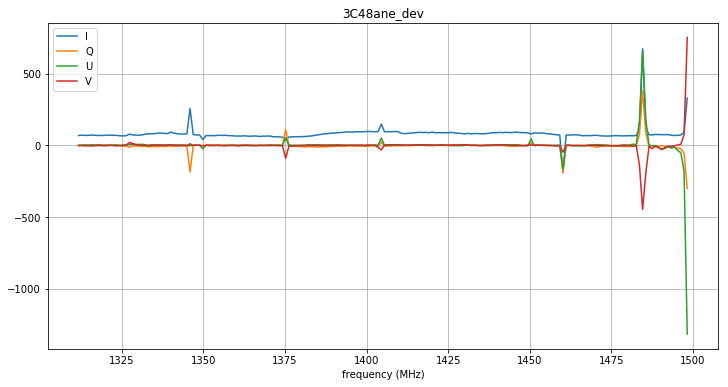

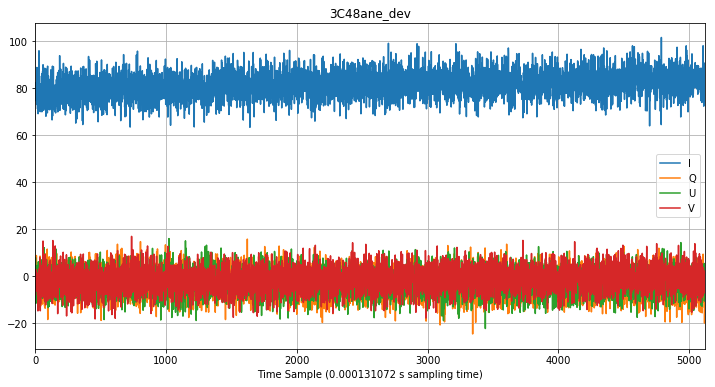

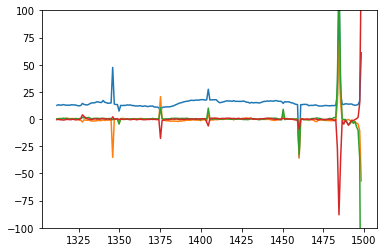

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)


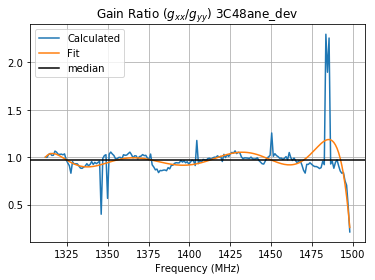

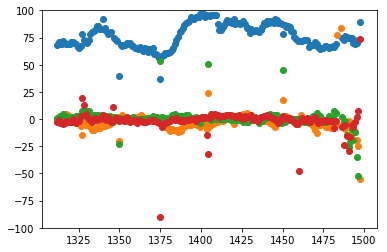

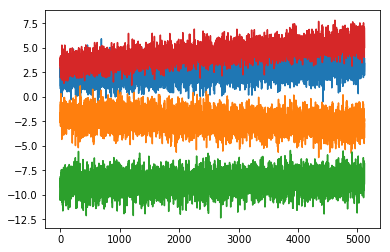

123.811714


In [135]:
#gain
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C48/'
source_name = '3C48'
obs_name = 'ane'
IMAGELABEL=source_name + obs_name + "TEST"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True,normalize=False)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True,normalize=False)

#peak,timestart,timestop=find_peak(I,-,t_samp)
plt.figure()
plt.plot(freq_test[0],I_f/np.std(np.mean(I,0)))
plt.plot(freq_test[0],Q_f/np.std(np.mean(Q,0)))
plt.plot(freq_test[0],U_f/np.std(np.mean(U,0)))
plt.plot(freq_test[0],V_f/np.std(np.mean(V,0)))
plt.ylim(-100,100)
plt.show()

ratio,ratio_fit_params = dsapol.gaincal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)

ratio_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    ratio_fit += ratio_fit_params[i]*(freq_test[0]**(deg-i))
ratio_def = ratio_fit
"""
I_err_f = []
for i in range(len(I_f)):
        I_err_f.append(np.sqrt(np.mean((I[i,:]/np.std(I[i,:]) - np.mean(I[i,:]))**2)))
I_err_f = np.array(I_err_f)

Q_err_f = []
for i in range(len(Q_f)):
        Q_err_f.append(np.sqrt(np.mean((Q[i,:]/np.std(Q[i,:]) - np.mean(Q[i,:]))**2)))
Q_err_f = np.array(Q_err_f)

U_err_f = []
for i in range(len(U_f)):
        U_err_f.append(np.sqrt(np.mean((U[i,:]/np.std(U[i,:]) - np.mean(U[i,:]))**2)))
U_err_f = np.array(U_err_f)

V_err_f = []
for i in range(len(V_f)):
        #V_err_f.append(np.sqrt(np.mean(((V[i,:] - V_f[i])/np.std(V[i,:]))**2)))
        V_err_f.append(np.sqrt(np.mean((V[i,:]/np.std(V[i,:]) - np.mean(V[i,:]))**2)))
V_err_f = np.array(V_err_f)
"""
I_err_f = I.std(1)/np.sqrt(I.shape[1])
Q_err_f = Q.std(1)/np.sqrt(Q.shape[1])
U_err_f = U.std(1)/np.sqrt(U.shape[1])
V_err_f = V.std(1)/np.sqrt(V.shape[1])

plt.figure()
plt.errorbar(freq_test[0],I_f,I_err_f,fmt='o')
plt.errorbar(freq_test[0],Q_f,Q_err_f,fmt='o')
plt.errorbar(freq_test[0],U_f,U_err_f,fmt='o')
plt.errorbar(freq_test[0],V_f,V_err_f,fmt='o')
plt.ylim(-100,100)
plt.show()

plt.figure()
p=plt.plot(I[0,:]/np.std(I[0,:]))
#plt.axhline(I_f[0],color=p[0].get_color())
plt.plot(Q[0,:]/np.std(Q[0,:]))
plt.plot(U[0,:]/np.std(U[0,:]))
plt.plot(V[0,:]/np.std(V[0,:]))
plt.show()

print(np.sqrt(np.mean((I[0,:] - I_f[0])**2)))


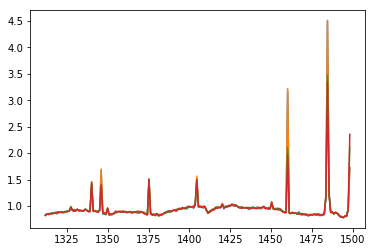

In [136]:
plt.plot(freq_test[0],I_err_f)
plt.plot(freq_test[0],Q_err_f)
plt.plot(freq_test[0],U_err_f)
plt.plot(freq_test[0],V_err_f)


(192, 1000)


(-100, 100)

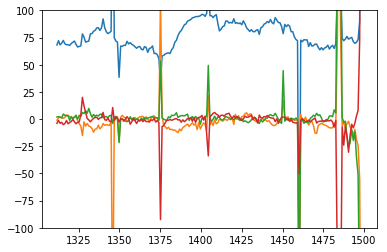

In [137]:
I_samps = []
Q_samps = []
U_samps = []
V_samps = []

for i in range(len(I_f)):
    I_samps.append(np.random.normal(I_f[i],I_err_f[i],trials))
    Q_samps.append(np.random.normal(Q_f[i],Q_err_f[i],trials))
    U_samps.append(np.random.normal(U_f[i],U_err_f[i],trials))
    V_samps.append(np.random.normal(V_f[i],V_err_f[i],trials))   
I_samps = np.array(I_samps)
Q_samps = np.array(Q_samps)
U_samps = np.array(U_samps)
V_samps = np.array(V_samps)
print(I_samps.shape)
plt.plot(freq_test[0],I_samps[:,0])
plt.plot(freq_test[0],Q_samps[:,0])
plt.plot(freq_test[0],U_samps[:,0])
plt.plot(freq_test[0],V_samps[:,0])
plt.ylim(-100,100)

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:668: RankWarning: Polyfit may be poorly conditioned
  ratio_fit,fit_params = compute_fit(ratio,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.p

(1000, 192)
0.9712742885965505


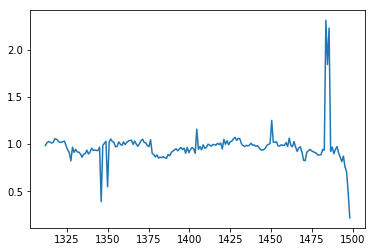

In [138]:
#Get samples of ratio
ratio_samps = []
ratio_samps_fit = []
for i in range(trials):
    ratio,ratio_fit_params = dsapol.gaincal(I_samps[:,i],Q_samps[:,i],U_samps[:,i],V_samps[:,i],freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=False,show=False)
    ratio_samps.append(ratio)
    ratio_fit = np.zeros(np.shape(freq_test[0]))
    for i in range(deg+1):
        ratio_fit += ratio_fit_params[i]*(freq_test[0]**(deg-i))
    ratio_use = ratio_fit
    
    ratio_samps_fit.append(ratio_use)
ratio_samps = np.array(ratio_samps)
ratio_samps_fit = np.array(ratio_samps_fit)
print(ratio_samps.shape)
plt.plot(freq_test[0],ratio_samps[0,:])
print(np.mean(ratio_samps[0,:]))


Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/3C286jqc_dev_3.fil
Binning by 1 in time
Binning by 32 in fr

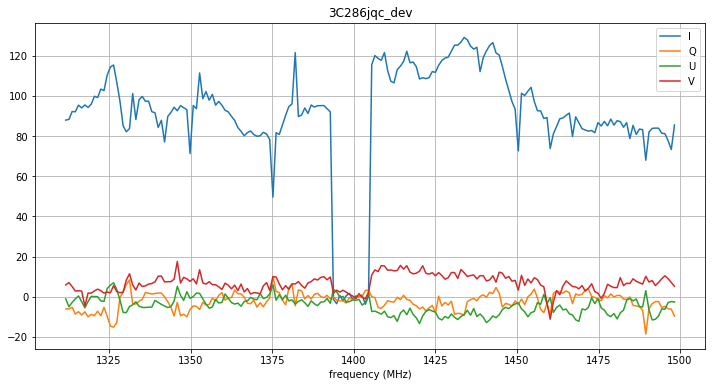

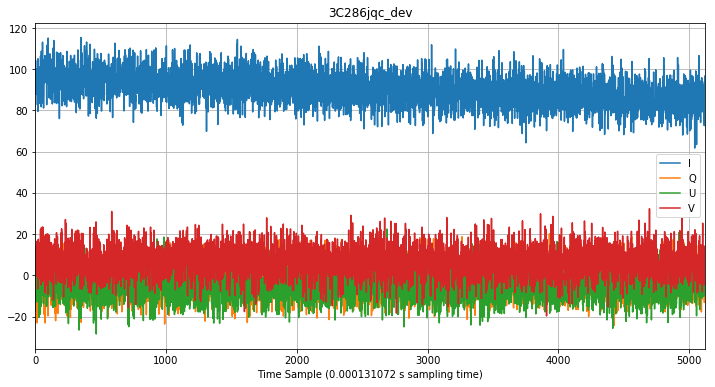

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)


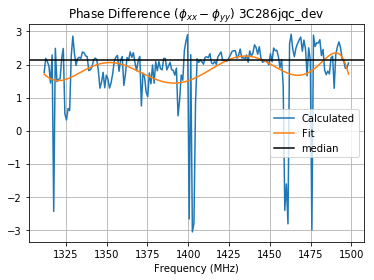

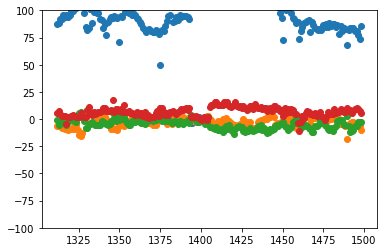

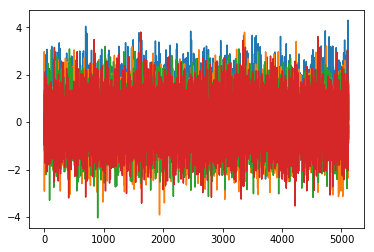

156.79459


In [139]:
#Error in phasediff vs freq
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/3C286/'
source_name = '3C286'
obs_name = 'jqc'
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

label = source_name + obs_name + suffix
sdir = datadir + label
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,label,nsamps,n_t=n_t,n_f=n_f,n_off=-1,sub_offpulse_mean=False)
(I_f,Q_f,U_f,V_f) = dsapol.get_stokes_vs_freq(I,Q,U,V,-1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True,normalize=False)
(I_t,Q_t,U_t,V_t) = dsapol.get_stokes_vs_time(I,Q,U,V,-1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=True,show=True,normalize=False)
phase,phase_fit_params = dsapol.phasecal(I_f,Q_f,U_f,V_f,freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=True,show=True)
#phase, phase_fit_params = dsapol.phasecal_full(datadir, source_name, ['jqc','fvn','dnz','kus','oxr','vwy'], n_t, n_f, nsamps, deg, suffix='_dev', average=True, plot=False, show=False)
phase_fit = np.zeros(np.shape(freq_test[0]))
for i in range(deg+1):
    phase_fit += phase_fit_params[i]*(freq_test[0]**(deg-i))
phase_def = phase_fit
"""
I_err_f = []
for i in range(len(I_f)):
        I_err_f.append(np.sqrt(np.mean((I[i,:]/np.std(I[i,:]) - np.mean(I[i,:]))**2)))
I_err_f = np.array(I_err_f)

Q_err_f = []
for i in range(len(Q_f)):
        Q_err_f.append(np.sqrt(np.mean((Q[i,:]/np.std(Q[i,:]) - np.mean(Q[i,:]))**2)))
Q_err_f = np.array(Q_err_f)

U_err_f = []
for i in range(len(U_f)):
        U_err_f.append(np.sqrt(np.mean((U[i,:]/np.std(U[i,:]) - np.mean(U[i,:]))**2)))
U_err_f = np.array(U_err_f)

V_err_f = []
for i in range(len(V_f)):
        #V_err_f.append(np.sqrt(np.mean(((V[i,:] - V_f[i])/np.std(V[i,:]))**2)))
        V_err_f.append(np.sqrt(np.mean((V[i,:]/np.std(V[i,:]) - np.mean(V[i,:]))**2)))
V_err_f = np.array(V_err_f)
"""

I_err_f = I.std(1)/np.sqrt(I.shape[1])
Q_err_f = Q.std(1)/np.sqrt(Q.shape[1])
U_err_f = U.std(1)/np.sqrt(U.shape[1])
V_err_f = V.std(1)/np.sqrt(V.shape[1])

plt.figure()
plt.errorbar(freq_test[0],I_f,I_err_f,fmt='o')
plt.errorbar(freq_test[0],Q_f,Q_err_f,fmt='o')
plt.errorbar(freq_test[0],U_f,U_err_f,fmt='o')
plt.errorbar(freq_test[0],V_f,V_err_f,fmt='o')
plt.ylim(-100,100)
plt.show()

plt.figure()
p=plt.plot(I[0,:]/np.std(I[0,:]))
#plt.axhline(I_f[0],color=p[0].get_color())
plt.plot(Q[0,:]/np.std(Q[0,:]))
plt.plot(U[0,:]/np.std(U[0,:]))
plt.plot(V[0,:]/np.std(V[0,:]))
plt.show()

print(np.sqrt(np.mean((I[0,:] - I_f[0])**2)))

In [140]:
help(dsapol.phasecal_full)

Help on function phasecal_full in module dsapol.dsapol:

phasecal_full(datadir, source_name, obs_names, n_t, n_f, nsamps, deg, suffix='_dev', average=False, plot=False, show=False)
    #Takes directory with all linear calibrator observations and calibrator name and computes average phase difference
    #vs frequency



(192, 1000)


(-100, 100)

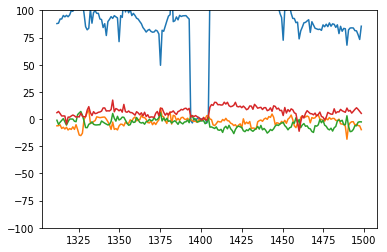

In [141]:
I_samps = []
Q_samps = []
U_samps = []
V_samps = []

for i in range(len(I_f)):
    I_samps.append(np.random.normal(I_f[i],I_err_f[i],trials))
    Q_samps.append(np.random.normal(Q_f[i],Q_err_f[i],trials))
    U_samps.append(np.random.normal(U_f[i],U_err_f[i],trials))
    V_samps.append(np.random.normal(V_f[i],V_err_f[i],trials))   
I_samps = np.array(I_samps)
Q_samps = np.array(Q_samps)
U_samps = np.array(U_samps)
V_samps = np.array(V_samps)
print(I_samps.shape)
plt.plot(freq_test[0],I_samps.mean(1))
plt.plot(freq_test[0],Q_samps.mean(1))
plt.plot(freq_test[0],U_samps.mean(1))
plt.plot(freq_test[0],V_samps.mean(1))
plt.ylim(-100,100)

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110_pol_dev-1.0.0-py3.6.egg/dsapol/dsapol.py:701: RankWarning: Polyfit may be poorly conditioned
  phase_diff_fit,fit_params = compute_fit(phase_diff,freq_test[0],deg)
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/dsa_110

(1000, 192)
1.8530522414862063


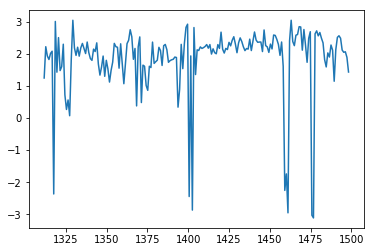

In [142]:
#Get samples of phasediff
phase_samps = []
phase_samps_fit = []
for i in range(trials):
    phase,phase_fit_params = dsapol.phasecal(I_samps[:,i],Q_samps[:,i],U_samps[:,i],V_samps[:,i],freq_test,stokes=True,deg=deg,datadir=datadir,label=label,plot=False,show=False)
    phase_samps.append(phase)
    phase_fit = np.zeros(np.shape(freq_test[0]))
    for i in range(deg+1):
        phase_fit += phase_fit_params[i]*(freq_test[0]**(deg-i))
    phase_use = phase_fit
    phase_samps_fit.append(phase_use)
phase_samps = np.array(phase_samps)
phase_samps_fit = np.array(phase_samps_fit)
print(phase_samps.shape)
plt.plot(freq_test[0],phase_samps[0,:])
print(np.mean(phase_samps[0,:]))


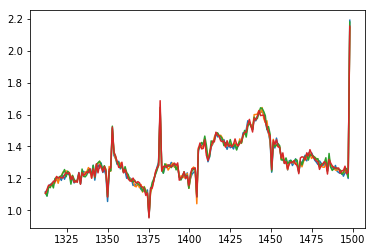

In [143]:
plt.plot(freq_test[0],I_err_f)
plt.plot(freq_test[0],Q_err_f)
plt.plot(freq_test[0],U_err_f)
plt.plot(freq_test[0],V_err_f)


In [144]:
#ratio_samps = ratio_samps.transpose()
#phase_samps = phase_samps.transpose()
#ratio_samps_fit = ratio_samps_fit.transpose()
#phase_samps_fit = phase_samps_fit.transpose()

In [145]:
ratio_samps[i,:].shape
freq_test[0].shape

(192,)

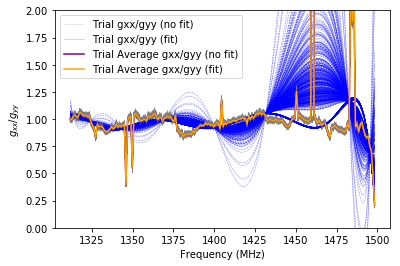

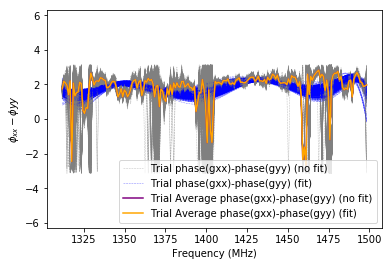

In [146]:
plt.figure()

for i in range(trials):
    if i ==0:
        plt.plot(freq_test[0],ratio_samps[i,:],'--',color='gray',linewidth=0.5,alpha=0.5,label="Trial gxx/gyy (no fit)")
        plt.plot(freq_test[0],ratio_samps_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5,label="Trial gxx/gyy (fit)")
    else:
        plt.plot(freq_test[0],ratio_samps[i,:],'--',color='gray',linewidth=0.5,alpha=0.5)
        plt.plot(freq_test[0],ratio_samps_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5)
plt.plot(freq_test[0],ratio_samps.mean(0),color="purple",label="Trial Average gxx/gyy (no fit)")
plt.plot(freq_test[0],ratio_samps.mean(0),color="orange",label="Trial Average gxx/gyy (fit)")
#plt.plot(freq_test[0],ratio_samps,color='red',label="True Fraction")
plt.xlabel("Frequency (MHz)")
plt.ylabel(r'$g_{xx}/g_{yy}$')
#plt.xlim(3812,3816)
plt.ylim(0,2)
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_TRIALS_GAIN_" + IMAGELABEL + "--2.pdf")
plt.show()
plt.show()

plt.figure()

for i in range(trials):
    if i ==0:
        plt.plot(freq_test[0],phase_samps[i,:],'--',color='gray',linewidth=0.5,alpha=0.5,label="Trial phase(gxx)-phase(gyy) (no fit)")
        plt.plot(freq_test[0],phase_samps_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5,label="Trial phase(gxx)-phase(gyy) (fit)")
    else:
        plt.plot(freq_test[0],phase_samps[i,:],'--',color='gray',linewidth=0.5,alpha=0.5)
        plt.plot(freq_test[0],phase_samps_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5)
plt.plot(freq_test[0],phase_samps.mean(0),color="purple",label="Trial Average phase(gxx)-phase(gyy) (no fit)")
plt.plot(freq_test[0],phase_samps.mean(0),color="orange",label="Trial Average phase(gxx)-phase(gyy) (fit)")
#plt.plot(freq_test[0],ratio_samps,color='red',label="True Fraction")
plt.xlabel("Frequency (MHz)")
plt.ylabel(r'$\phi_{xx}-\phi{yy}$')
#plt.xlim(3812,3816)
plt.ylim(-2*np.pi,2*np.pi)
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_TRIALS_PHASE_" + IMAGELABEL + "--2.pdf")
plt.show()
plt.show()


In [147]:
trials

1000

In [148]:
ratio_means = np.mean(ratio_samps,axis=0)
ratio_means_fit = np.mean(ratio_samps_fit,axis=0)
(hist,b) = np.histogram(ratio_means,np.linspace(0.5,1.5,50))
(hist_fit,b_fit) = np.histogram(ratio_means_fit,np.linspace(0.5,1.5,50))

popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2, hist,p0=[25,1.0,0.1])
print(popt)
popt_fit,pcov_fit = curve_fit(gaussian,b_fit[:-1] + (b_fit[2]-b_fit[1])/2, hist_fit,p0=[25,1.0,0.1])
print(popt_fit)


[24.93734492  0.97595577  0.05942068]
[23.22168359  0.95801138  0.04814464]


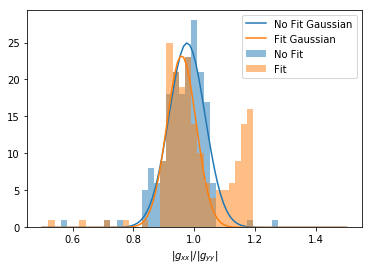

In [149]:
plt.figure()
p0=plt.plot(np.linspace(0.5,1.5,100), gaussian(np.linspace(0.5,1.5,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
p1=plt.plot(np.linspace(0.5,1.5,100), gaussian(np.linspace(0.5,1.5,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")

plt.hist(ratio_means,np.linspace(0.5,1.5,50),color=p0[0].get_color(),alpha=0.5,label="No Fit")
plt.hist(ratio_means_fit,np.linspace(0.5,1.5,50),color=p1[0].get_color(),alpha=0.5,label="Fit")

#plt.axvline(Upperlimit,ls='--',color=p0[0].get_color(),label=r'$\sigma = $' + str(np.around(popt[2],2)) + ' (no fit)')
#plt.axvline(Upperlimit_fit,ls='--',color=p1[0].get_color(),label=r'$\sigma = $' + str(np.around(popt_fit[2],2)) + ' (no fit)')
#plt.plot(b[:-1] + (b[2]-b[1])/2,hist,label)
plt.xlabel(r'$|g_{xx}|/|g_{yy}|$')
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_GAIN_" + IMAGELABEL + "--2.pdf")
plt.show()

In [150]:
phase_means = np.mean(phase_samps,axis=0)
phase_means_fit = np.mean(phase_samps_fit,axis=0)
(hist,b) = np.histogram(phase_means,np.linspace(0,np.pi,20))
(hist_fit,b_fit) = np.histogram(phase_means_fit,np.linspace(0,np.pi,20))

popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2, hist,p0=[80,2,0.1])
#popt,pcov = ((20,0,1),0)
print(popt)
popt_fit,pcov_fit = curve_fit(gaussian,b_fit[:-1] + (b_fit[2]-b_fit[1])/2, hist_fit,p0=[80,2,0.1])
print(popt_fit)


[35.61558574  2.14131355  0.30273088]
[38.41618061  1.8334478   0.34845331]


In [151]:
0.0598268/np.pi

0.01904346189874041

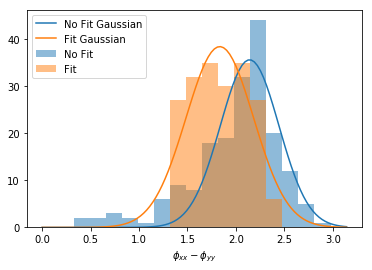

In [152]:
plt.figure()
p0=plt.plot(np.linspace(0,np.pi,100), gaussian(np.linspace(0,np.pi,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
p1=plt.plot(np.linspace(0,np.pi,100), gaussian(np.linspace(0,np.pi,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")

plt.hist(phase_means,np.linspace(0,np.pi,20),color=p0[0].get_color(),alpha=0.5,label="No Fit")
plt.hist(phase_means_fit,np.linspace(0,np.pi,20),color=p1[0].get_color(),alpha=0.5,label="Fit")

#plt.axvline(Upperlimit,ls='--',color=p0[0].get_color(),label=r'$\sigma = $' + str(popt[2]) + ' (no fit)')
#plt.axvline(Upperlimit_fit,ls='--',color=p1[0].get_color(),label=r'$\sigma = $' + str(popt_fit[2]) + ' (no fit)')
#plt.plot(b[:-1] + (b[2]-b[1])/2,hist,label)
plt.xlabel(r'$\phi_{xx} - \phi_{yy}$')
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_PHASE_" + IMAGELABEL + "--2.pdf")
plt.show()

Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights

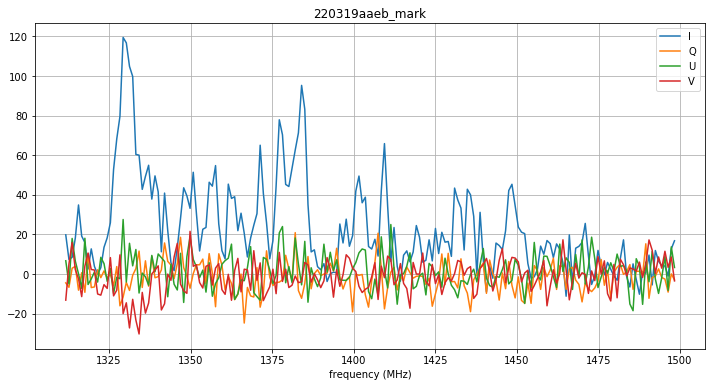

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

In [153]:
#Simulate calibrated I,Q,U,V to get errors
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/'
label="220319aaeb_mark"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,'220319aaeb_dev',nsamps,n_t=n_t,n_f=n_f,n_off=3000,sub_offpulse_mean=True)#("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/","220319aaeb_dev",5120,n_f=32)
(I_cal_f_sim,Q_cal_f_sim,V_cal_f_sim,U_cal_f_sim) = dsapol.get_stokes_vs_freq(I,Q,U,V,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True,buff=1,normalize=True)
peak,timestart,timestop=dsapol.find_peak(I, 1, fobj.header.tsamp,buff=1)

p_all = []
p_t_trials = []

p_all_fit = []
p_t_trials_fit = []

for i in range(trials):
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps[i,:],phase_samps[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)

    p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False,buff=1,normalize=True)
    #p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    #avg = np.mean(p_t[timestart:timestop])
    
    p_all.append(avg)
    p_t_trials.append(p_t)
    
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps_fit[i,:],phase_samps_fit[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)

    p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False,buff=1,normalize=True)
    #p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    #avg = np.mean(p_t[timestart:timestop])
    
    p_all_fit.append(avg)
    p_t_trials_fit.append(p_t)

p_t_trials = np.array(p_t_trials)
p_t_trials_fit = np.array(p_t_trials_fit)


In [154]:
print(len(p_t_trials[0,:]))
peak,timestart,timestop = dsapol.find_peak(I,1,fobj.header.tsamp,buff=1)
print(timestart,timestop)

5120
3812 3816


2D Calibration
(192, 5120) (192, 5120) (192, 5120)


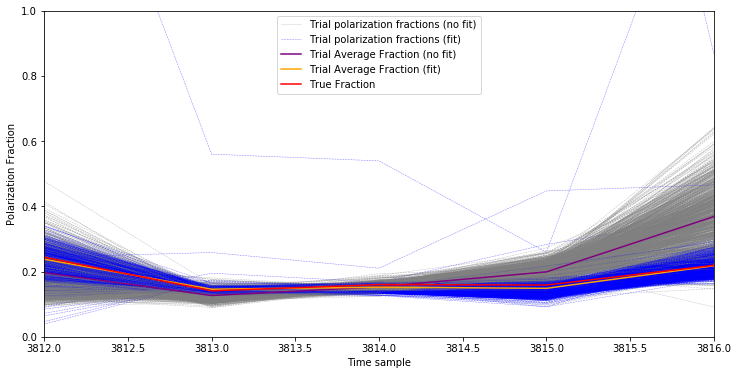

In [155]:
plt.figure(figsize=(12,6))

(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_def,phase_def)
(I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
(I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)
(I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)

p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False,buff=1,normalize=True)



for i in range(trials):
    if i ==0:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (no fit)")
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (fit)")
    else:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5)
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5)
plt.plot(p_t_trials.mean(0),color="purple",label="Trial Average Fraction (no fit)")
plt.plot(p_t_trials_fit.mean(0),color="orange",label="Trial Average Fraction (fit)")
plt.plot(p_t,color='red',label="True Fraction")
plt.xlabel("Time sample")
plt.ylabel("Polarization Fraction")
plt.xlim(3812,3816)
plt.ylim(0,1)
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_TRIALS_" + IMAGELABEL + "--2.pdf")
plt.show()
plt.show()



In [156]:
print(np.shape(p_t_trials[p_t_trials<1]))

(822894,)


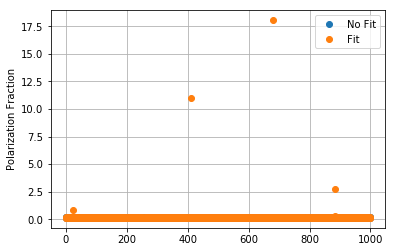

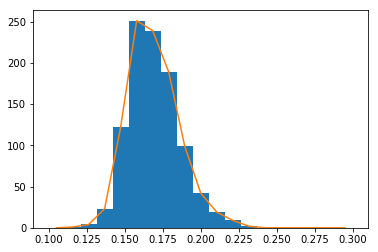

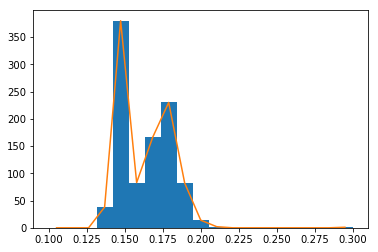

In [157]:
plt.figure()
plt.plot(p_all,'o',label="No Fit")
plt.plot(p_all_fit,'o',label="Fit")
plt.grid()
plt.ylabel("Polarization Fraction")
plt.legend()
plt.show()

(hist,b) = np.histogram(p_all,np.linspace(0.1,0.3,20))#np.linspace(0.1,0.3,20))
plt.figure()
plt.hist(p_all,np.linspace(0.1,0.3,20))
plt.plot(b[:-1] + (b[2]-b[1])/2,hist)
plt.show()

(hist_fit,b_fit) = np.histogram(p_all_fit,np.linspace(0.1,0.3,20))#np.linspace(0.1,0.3,20))
plt.figure()
plt.hist(p_all_fit,np.linspace(0.1,0.3,20))
plt.plot(b_fit[:-1] + (b_fit[2]-b_fit[1])/2,hist_fit)
plt.show()

In [158]:
#Fit Gaussian
popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2, hist,p0=[250,0.16,0.1])
print(popt)
Upperlimit = (norm.isf(0.05,popt[1],np.abs(popt[2])))
print(Upperlimit)

popt_fit,pcov_fit = curve_fit(gaussian,b_fit[:-1] + (b_fit[2]-b_fit[1])/2, hist_fit,p0=[250,0.16,0.1])
print(popt_fit)
Upperlimit_fit = (norm.isf(0.05,popt_fit[1],np.abs(popt_fit[2])))
print(Upperlimit_fit)

[2.59492674e+02 1.66617665e-01 1.59768763e-02]
0.19289728824191502
[2.18140340e+02 1.61210745e-01 2.04242345e-02]
0.19480562148824543


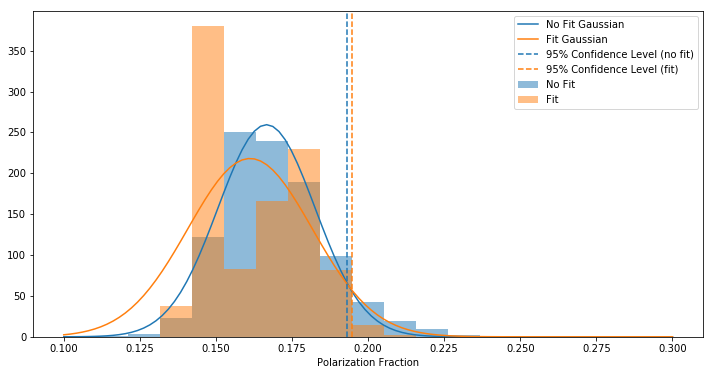

In [159]:
from scipy.stats import norm

#calculate 95% confidence level
#popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2,hist,p0=[25,0.3,0.1])
#Upperlimit = (norm.isf(0.05,popt[1],popt[2]))
#print(Upperlimit)
plt.figure(figsize=(12,6))
p0=plt.plot(np.linspace(0.1,0.3,100), gaussian(np.linspace(0.1,0.3,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
p1=plt.plot(np.linspace(0.1,0.3,100), gaussian(np.linspace(0.1,0.3,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")
#p0=plt.plot(np.linspace(0,1,100), gaussian(np.linspace(0,1,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
#p1=plt.plot(np.linspace(0,1,100), gaussian(np.linspace(0,1,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")



plt.hist(p_all,np.linspace(0.1,0.3,20),color=p0[0].get_color(),alpha=0.5,label="No Fit")
plt.hist(p_all_fit,np.linspace(0.1,0.3,20),color=p1[0].get_color(),alpha=0.5,label="Fit")
#plt.plot(b[:-1] + (b[2]-b[1])/2,hist,label)
plt.axvline(Upperlimit,ls='--',color=p0[0].get_color(),label="95% Confidence Level (no fit)")
plt.axvline(Upperlimit_fit,ls='--',color=p1[0].get_color(),label="95% Confidence Level (fit)")
plt.xlabel("Polarization Fraction")
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_" + IMAGELABEL + "--2.pdf")
plt.show()


In [160]:
print(Upperlimit,Upperlimit_fit)

0.19289728824191502 0.19480562148824543


Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights

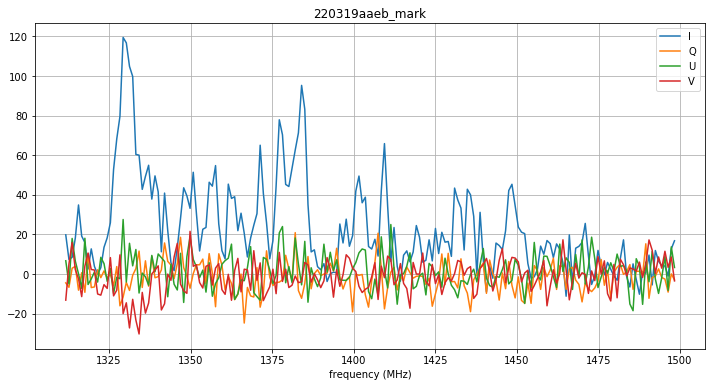

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

In [161]:
#Linear pol
#Simulate calibrated I,Q,U,V to get errors
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/'
label="220319aaeb_mark"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,'220319aaeb_dev',nsamps,n_t=n_t,n_f=n_f,n_off=3000,sub_offpulse_mean=True)#("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/","220319aaeb_dev",5120,n_f=32)
(I_cal_f_sim,Q_cal_f_sim,V_cal_f_sim,U_cal_f_sim) = dsapol.get_stokes_vs_freq(I,Q,U,V,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True,buff=1,normalize=True)
peak,timestart,timestop=dsapol.find_peak(I, 1, fobj.header.tsamp,buff=1)

p_all = []
p_t_trials = []

p_all_fit = []
p_t_trials_fit = []

for i in range(trials):
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps[i,:],phase_samps[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)

    #p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)
    p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    avg = np.mean(p_t[timestart:timestop])
    
    p_all.append(avg)
    p_t_trials.append(p_t)
    
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps_fit[i,:],phase_samps_fit[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1,normalize=True)

    #p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)
    p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    avg = np.mean(p_t[timestart:timestop])
    
    p_all_fit.append(avg)
    p_t_trials_fit.append(p_t)

p_t_trials = np.array(p_t_trials)
p_t_trials_fit = np.array(p_t_trials_fit)

2D Calibration
(192, 5120) (192, 5120) (192, 5120)


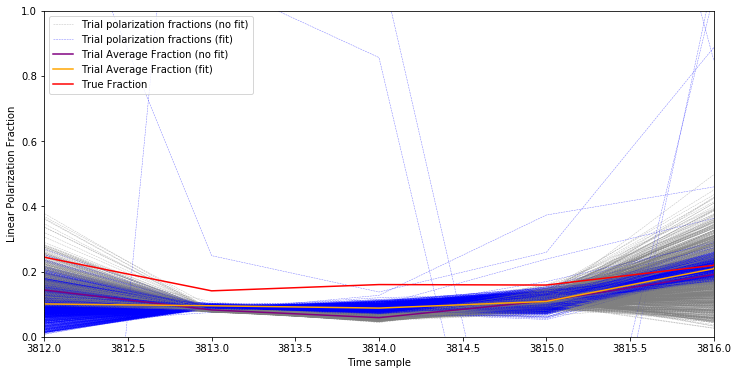

In [162]:
plt.figure(figsize=(12,6))

(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_def,phase_def)
(I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
(I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False,buff=1)
(I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False,buff=1)

p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False,buff=1)



for i in range(trials):
    if i ==0:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (no fit)")
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (fit)")
    else:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5)
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5)
plt.plot(p_t_trials.mean(0),color="purple",label="Trial Average Fraction (no fit)")
plt.plot(p_t_trials_fit.mean(0),color="orange",label="Trial Average Fraction (fit)")
plt.plot(p_t,color='red',label="True Fraction")
plt.xlabel("Time sample")
plt.ylabel("Linear Polarization Fraction")
plt.xlim(3812,3816)
plt.ylim(0,1)
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_LIN_TRIALS_" + IMAGELABEL + "--2.pdf")
plt.show()
plt.show()


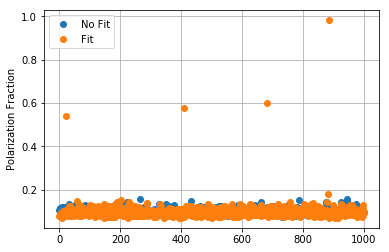

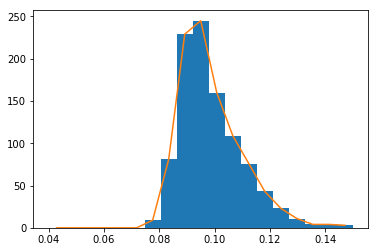

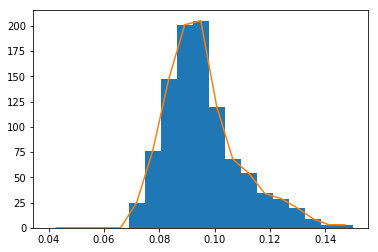

In [169]:
plt.figure()
plt.plot(p_all,'o',label="No Fit")
plt.plot(p_all_fit,'o',label="Fit")
plt.grid()
plt.ylabel("Polarization Fraction")
plt.legend()
plt.show()

(hist,b) = np.histogram(p_all,np.linspace(0.04,0.15,20))
plt.figure()
plt.hist(p_all,np.linspace(0.04,0.15,20))
plt.plot(b[:-1] + (b[2]-b[1])/2,hist)
plt.show()

(hist_fit,b_fit) = np.histogram(p_all_fit,np.linspace(0.04,0.15,20))
plt.figure()
plt.hist(p_all_fit,np.linspace(0.04,0.15,20))
plt.plot(b_fit[:-1] + (b_fit[2]-b_fit[1])/2,hist_fit)
plt.show()

In [170]:
#Fit Gaussian
popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2, hist,p0=[250,0.1,0.1])
print(popt)
Upperlimit = (norm.isf(0.05,popt[1],np.abs(popt[2])))
print(Upperlimit)

popt_fit,pcov_fit = curve_fit(gaussian,b_fit[:-1] + (b_fit[2]-b_fit[1])/2, hist_fit,p0=[250,0.1,0.05])
print(popt_fit)
Upperlimit_fit = (norm.isf(0.05,popt_fit[1],np.abs(popt_fit[2])))
print(Upperlimit_fit)


[2.38705641e+02 9.51300759e-02 9.04286608e-03]
0.11000426697892252
[2.03327527e+02 9.19126898e-02 1.03979146e-02]
0.10901573731707104


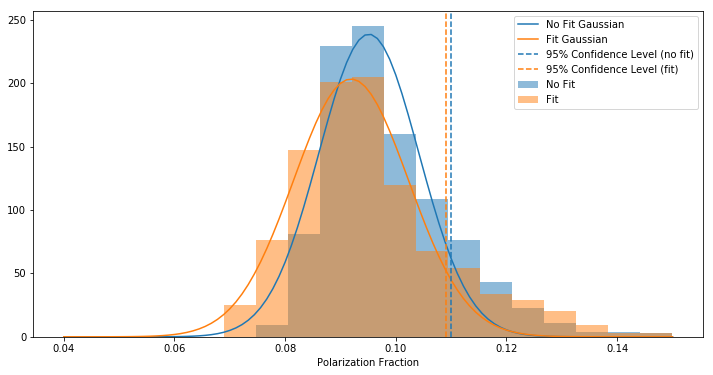

In [171]:

from scipy.stats import norm

#calculate 95% confidence level
#popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2,hist,p0=[25,0.3,0.1])
#Upperlimit = (norm.isf(0.05,popt[1],popt[2]))
#print(Upperlimit)
plt.figure(figsize=(12,6))
p0=plt.plot(np.linspace(0.04,0.15,100), gaussian(np.linspace(0.04,0.15,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
p1=plt.plot(np.linspace(0.04,0.15,100), gaussian(np.linspace(0.04,0.15,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")

plt.hist(p_all,np.linspace(0.04,0.15,20),color=p0[0].get_color(),alpha=0.5,label="No Fit")
plt.hist(p_all_fit,np.linspace(0.04,0.15,20),color=p1[0].get_color(),alpha=0.5,label="Fit")
#plt.plot(b[:-1] + (b[2]-b[1])/2,hist,label)
plt.axvline(Upperlimit,ls='--',color=p0[0].get_color(),label="95% Confidence Level (no fit)")
plt.axvline(Upperlimit_fit,ls='--',color=p1[0].get_color(),label="95% Confidence Level (fit)")
plt.xlabel("Polarization Fraction")
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_LIN_" + IMAGELABEL + "--2.pdf")
plt.show()


In [172]:
print(Upperlimit,Upperlimit_fit)

0.11000426697892252 0.10901573731707104


# END


Reading stokes param...0Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Done!
Reading stokes param...1Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Done!
Reading stokes param...2Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Done!
Reading stokes param...3Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_3.fil
Done!
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_0.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_1.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/220319aaeb_dev_2.fil
Reading Filterbank File: /home/ubuntu/sherman/scratch_weights

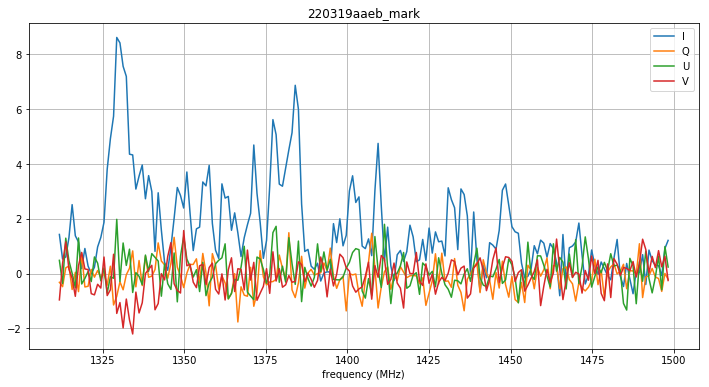

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192, 5120) (192, 5120)
2D Calibration
(192, 5120) (192

In [591]:
#Same but compute pol fraction before averaging
#Simulate calibrated I,Q,U,V to get errors
datadir = '/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/'
label="220319aaeb_mark"
suffix='_dev'
n_t=1
n_f=32
nsamps=5120
deg=10

trials = 100
(I,Q,U,V,fobj,timeaxis,freq_test,wav_test) = dsapol.get_stokes_2D(datadir,'220319aaeb_dev',nsamps,n_t=n_t,n_f=n_f,n_off=3000,sub_offpulse_mean=True)#("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/","220319aaeb_dev",5120,n_f=32)
(I_cal_f_sim,Q_cal_f_sim,V_cal_f_sim,U_cal_f_sim) = dsapol.get_stokes_vs_freq(I,Q,U,V,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=True,show=True)
peak,timestart,timestop=dsapol.find_peak(I, 1, fobj.header.tsamp)

p_all = []
p_t_trials = []

p_all_fit = []
p_t_trials_fit = []

for i in range(trials):
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps[i,:],phase_samps[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False)

    #p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)
    #p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    #avg = np.mean(p_t[timestart:timestop])
    
    p_t = (np.sqrt(np.nanmean(Q_cal_sim**2 + U_cal_sim**2 + V_cal_sim**2,axis=0)))/I_cal_t_sim
    avg = np.mean(p_t[timestart:timestop])
    
    p_all.append(avg)
    p_t_trials.append(p_t)
    
    (gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_samps_fit[i,:],phase_samps_fit[i,:]%(2*np.pi))
    (I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
    (I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False)
    (I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False)

    #p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)
    #p_t = np.sqrt(Q_cal_t_sim**2 + U_cal_t_sim**2)/I_cal_t_sim
    #avg = np.mean(p_t[timestart:timestop])
    
    p_t = (np.sqrt(np.nanmean(Q_cal_sim**2 + U_cal_sim**2 + V_cal_sim**2,axis=0)))/I_cal_t_sim
    avg = np.mean(p_t[timestart:timestop])
    
    p_all_fit.append(avg)
    p_t_trials_fit.append(p_t)

p_t_trials = np.array(p_t_trials)
p_t_trials_fit = np.array(p_t_trials_fit)


2D Calibration
(192, 5120) (192, 5120) (192, 5120)


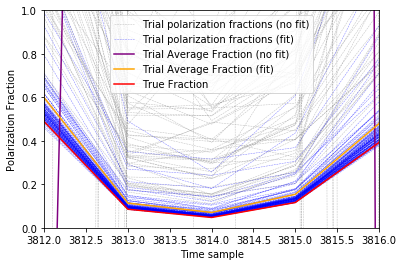

In [592]:
plt.figure()

(gxx,gyy) = dsapol.get_calmatrix_from_ratio_phasediff(ratio_def,phase_def)
(I_cal_sim,Q_cal_sim,V_cal_sim,U_cal_sim) = dsapol.calibrate(I,Q,U,V,(gxx,gyy),stokes=True)
(I_cal_f_sim,Q_cal_f_sim,U_cal_f_sim,V_cal_f_sim) = dsapol.get_stokes_vs_freq(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_f,freq_test,datadir=datadir,label=label,plot=False,show=False)
(I_cal_t_sim,Q_cal_t_sim,U_cal_t_sim,V_cal_t_sim) = dsapol.get_stokes_vs_time(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,n_t,datadir=datadir,label=label,plot=False,show=False)

#p_f,p_t,avg = dsapol.get_pol_fraction(I_cal_sim,Q_cal_sim,U_cal_sim,V_cal_sim,1,fobj.header.tsamp,1,32,freq_test,plot=True,datadir='.',label='',calstr='',ext=ext,pre_calc_tf=False,show=False)

p_t = (np.sqrt(np.nanmean(Q_cal_sim**2 + U_cal_sim**2 + V_cal_sim**2,axis=0)))/I_cal_t_sim
avg = np.mean(p_t[timestart:timestop])


for i in range(trials):
    if i ==0:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (no fit)")
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5,label="Trial polarization fractions (fit)")
    else:
        plt.plot(p_t_trials[i,:],'--',color='gray',linewidth=0.5,alpha=0.5)
        plt.plot(p_t_trials_fit[i,:],'--',color='blue',linewidth=0.5,alpha=0.5)
plt.plot(p_t_trials.mean(0),color="purple",label="Trial Average Fraction (no fit)")
plt.plot(p_t_trials_fit.mean(0),color="orange",label="Trial Average Fraction (fit)")
plt.plot(p_t,color='red',label="True Fraction")
plt.xlim(3812,3816)
plt.ylim(0,1)
plt.xlabel("Time sample")
plt.ylabel("Polarization Fraction")
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_TRIALS_METHOD2arf.pdf")
plt.show()
plt.show()



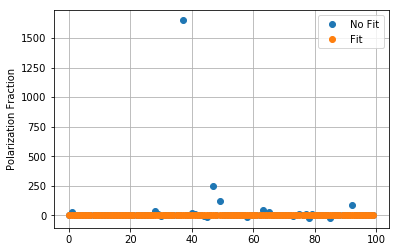

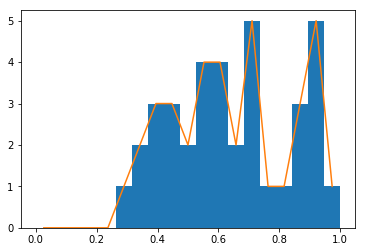

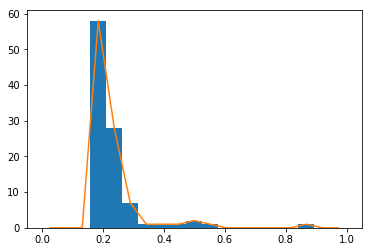

In [593]:
plt.figure()
plt.plot(p_all,'o',label="No Fit")
plt.plot(p_all_fit,'o',label="Fit")
plt.grid()
plt.ylabel("Polarization Fraction")
plt.legend()
plt.show()

(hist,b) = np.histogram(p_all,np.linspace(0,1,20))
plt.figure()
plt.hist(p_all,np.linspace(0,1,20))
plt.plot(b[:-1] + (b[2]-b[1])/2,hist)
plt.show()

(hist_fit,b_fit) = np.histogram(p_all_fit,np.linspace(0,1,20))
plt.figure()
plt.hist(p_all_fit,np.linspace(0,1,20))
plt.plot(b_fit[:-1] + (b_fit[2]-b_fit[1])/2,hist_fit)
plt.show()

In [594]:
#Fit Gaussian
popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2, hist,p0=[25,0.3,0.1])
print(popt)
Upperlimit = (norm.isf(0.05,popt[1],np.abs(popt[2])))
print(Upperlimit)

popt_fit,pcov_fit = curve_fit(gaussian,b_fit[:-1] + (b_fit[2]-b_fit[1])/2, hist_fit,p0=[25,0.3,0.1])
print(popt_fit)
Upperlimit_fit = (norm.isf(0.05,popt_fit[1],np.abs(popt_fit[2])))
print(Upperlimit_fit)

[3.36421537 0.66490343 0.26737801]
1.1047011189757443
[5.80016895e+01 1.84179054e-01 4.12338809e-03]
0.19096142421309928


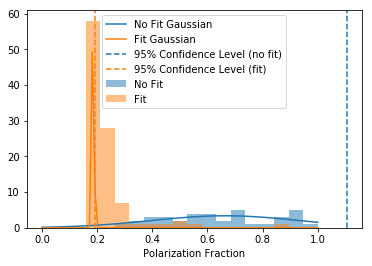

In [595]:
from scipy.stats import norm

#calculate 95% confidence level
#popt,pcov = curve_fit(gaussian,b[:-1] + (b[2]-b[1])/2,hist,p0=[25,0.3,0.1])
#Upperlimit = (norm.isf(0.05,popt[1],popt[2]))
#print(Upperlimit)
plt.figure()
p0=plt.plot(np.linspace(0,1,100), gaussian(np.linspace(0,1,100),popt[0],popt[1],popt[2]),label="No Fit Gaussian")
p1=plt.plot(np.linspace(0,1,100), gaussian(np.linspace(0,1,100),popt_fit[0],popt_fit[1],popt_fit[2]),label="Fit Gaussian")

plt.hist(p_all,np.linspace(0,1,20),color=p0[0].get_color(),alpha=0.5,label="No Fit")
plt.hist(p_all_fit,np.linspace(0,1,20),color=p1[0].get_color(),alpha=0.5,label="Fit")
#plt.plot(b[:-1] + (b[2]-b[1])/2,hist,label)
plt.axvline(Upperlimit,ls='--',color=p0[0].get_color(),label="95% Confidence Level (no fit)")
plt.axvline(Upperlimit_fit,ls='--',color=p1[0].get_color(),label="95% Confidence Level (fit)")
plt.xlabel("Polarization Fraction")
plt.legend()
plt.savefig("/home/ubuntu/sherman/scratch_weights_update_2022-06-03/220319aaeb_mark/UPPERLIMIT_METHOD2arf.pdf")
plt.show()